# GLOBAL POWER PLANT DATABASE  PROJECT


# Importing necessary Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset


In [2]:
df = pd.read_csv("Global_power_plant.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So here we can see The dataset contains the details of Global Power Plant. this dataset is comprised of 908 rows and 25 columns including 2 target varibales capacity_mw and primary_fuel(Fuel_Type) where we need to predict both capacity_mw and Fuel Type.

In [3]:
# Let's define primary_fuel as Fuel_Type to understand the dataset in better way
df.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

In [4]:
df.head()


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# EDA

In [5]:
df.shape


(907, 27)

In [6]:
df.dtypes


country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_Type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

So here we can see the dataset contains different features with different data types. Here there are two types of data namely object type and float64 data type . We will take care of the object datatype using encoding techniques later.


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   Fuel_Type                 907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

From the above cell we get the information about the dataset which includes indexing type, column type, no-null values and memory usage . from this we can notice the presence of null-values.


In [8]:
df.nunique()


country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
Fuel_Type                     8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

from the above cell we can check the no. of unique values present in each columns.

Here the columns country, country_long, other_fuel2, year_of_capacity_data and generation_data-source have only 1 unique value. Aslo other_fuel3, wepp_id, estimated_generation_gwh have no unique values which means they are filled with only NAN values. Since these columns have same entries thoughout the dataset so we can drop these columns.

In [9]:
df["country"].value_counts()


IND    907
Name: country, dtype: int64

    There is only 1 country in th edataset wo we can drio this as it has nothing to do with our prediction also we can drop the column country_long on this basis

In [10]:
df.drop(columns=['country','country_long'],axis=1,inplace=True)


In [11]:
df.drop(columns=['other_fuel2','year_of_capacity_data','generation_data_source','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)


In [12]:
df['name'].value_counts()


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

Here we can observe that the name column has unique name for each power plant so dropping this column is good to go.


In [13]:
df.drop(['name'],axis=1,inplace=True)


In [14]:
# checking the count of gppd-idnr
df['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

The column gppd_idnr also contains the unique ID of the power plant, so we can drop this column as well.


In [15]:
df.drop('gppd_idnr',axis=1,inplace=True)


The column Owner has more than 65% of null values also it may not important for prediction, so we can drop it


In [16]:
df.drop('owner',axis=1,inplace=True)


The column url also have no relation with the targets and it has nothing to do with prediction so we can drop it as well.


In [17]:
df.drop('url',axis=1,inplace=True)


In the above cells we dropped the columns which are irrelavent and may not required for our prediction.


# check null values 

In [18]:
df.isnull().sum()


capacity_mw              0
latitude                46
longitude               46
Fuel_Type                0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

So here we can see there are huge missing values present in most of the columns. We will fill them using imputation techniques after checking skewness in these columns.


# heatmap

<AxesSubplot:>

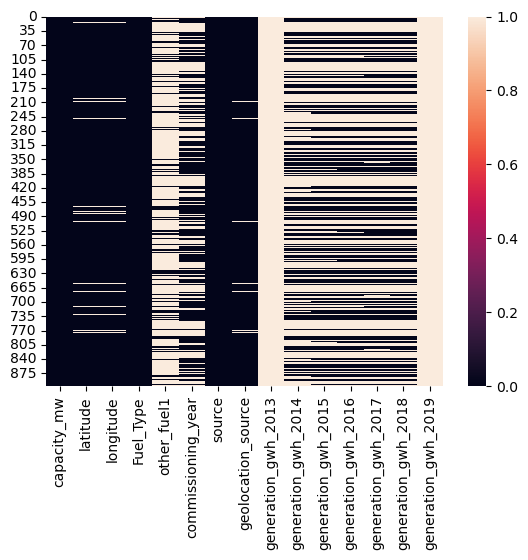

In [19]:
sns.heatmap(df.isnull())


So here we can easily see the white lines in the heatmap which indicates the missing values in the dataset.


In [20]:
df.skew()


capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2013         NaN
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
generation_gwh_2019         NaN
dtype: float64

# Treating null values using imputation technique.


Most of the columns have missing values except the target variables and the feature source.


The columns latitude has numerical data and has no skewness and outliers so we can use mean method to fill the outliers


In [21]:
df['latitude'].mean()  

21.19791811846691

In [22]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())


The features other_fuel1 and geolocation_source have categorical data so we can fill the null values using mode method.


In [23]:
df['other_fuel1'].mode()    

0    Oil
Name: other_fuel1, dtype: object

In [24]:
df['geolocation_source'].mode() 

0    WRI
Name: geolocation_source, dtype: object

So the modes of other_fuel1 and geolocation_source are Oil and WRI respectively which means they have more value counts in those columns .Let's fill the null values of categorical columns by their respective modes.


In [25]:
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])


In [26]:
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])


_ The columns longitude commissioning year, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh-2016 and generation_gwh_2017 are numerical type and have huge outliers and skewness so will replace missing values using median method



In [27]:
# filling null values using their median values
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())
df['generation_gwh_2019']=df['generation_gwh_2019'].fillna(df['generation_gwh_2019'].median())

now check the null values again 

In [28]:
df.isnull().sum()


capacity_mw              0
latitude                 0
longitude                0
Fuel_Type                0
other_fuel1              0
commissioning_year       0
source                   0
geolocation_source       0
generation_gwh_2013    907
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
generation_gwh_2019    907
dtype: int64

Now we have removed all the null values using imputation method and the data is now clean. So we can move further.


<AxesSubplot:>

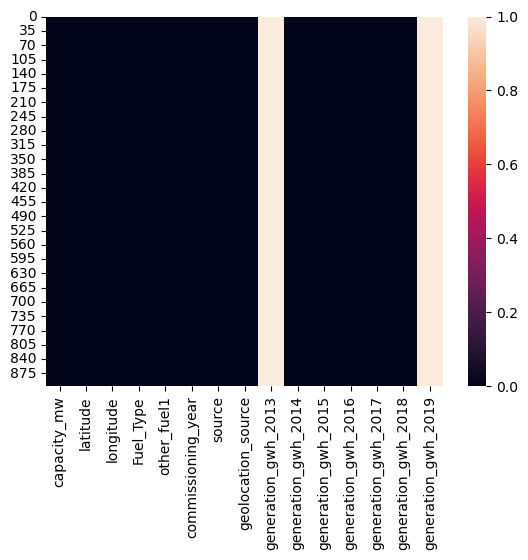

In [29]:
sns.heatmap(df.isnull())


so in 2013 and in 2019 there is no values so we can remove these columns 

In [30]:
df.drop('generation_gwh_2013',axis=1,inplace=True)
df.drop('generation_gwh_2019',axis=1,inplace=True)


<AxesSubplot:>

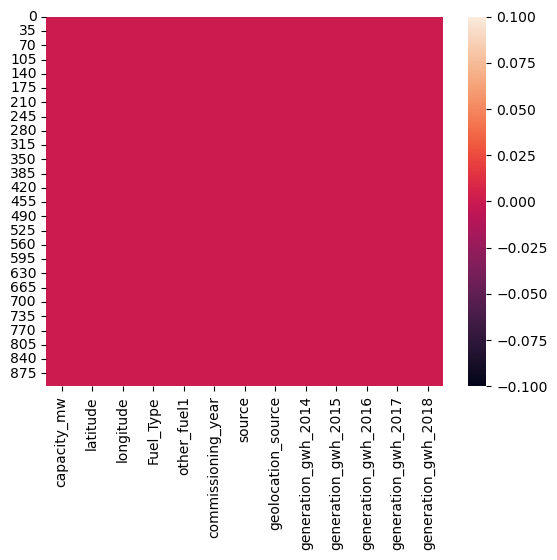

In [31]:
sns.heatmap(df.isnull())


So it is clear that there are no missing values present in the dataset


In [32]:
# checking how many columns are there in the dataset
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

These are the columns present in the dataset


In [33]:
# checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

There are unique counts present in capacity_mw columns


In [34]:
# ckecking the list of counts of primary_fuel
df['Fuel_Type'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64

There are the list of the values in the column fuel_type


In [35]:
# checking the uniqueness of primary_fuel
df['Fuel_Type'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

There are the unique classes present in the fuel_type columns.


In [36]:
# checking the list of counts of commissioning_year
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

There are the counts of commissioning years of the power plants.


In [37]:
# let's extract power plant age from commissioning year by subtraction it from the year 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

Here we have extracted Power plant age from commissioning year and dropped commissioning year columns. From Power plant age we can get to know how old are the power plants.

In [38]:
# let's check the data frame 
df.head()

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


In [39]:
# checking wheather the dataset contains any space
df.loc[df['capacity_mw']==" "]

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age


From the above cell it seems that there are no spaces in the dataset.


In [40]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,19.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,15.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,17.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,20.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,91.000000


Above cell gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/invalid values present.
Observation :-

The counts of columns are same which means there are no missing values present in the dataset.
The mean is more than the median(50%) in all the columns except latitude which means they are skewed to right.
The median is bit greate than the mean in the column latitude which means it is skewed to left.
From the difference between maximum and 75% we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.
The minimum capacity of the power plant is zero and maximum is 4760 and there is huge difference in mean and standard deviation.
So before visualizing the data, let's Separate categorical and numerical columns.

In [41]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']


So these are the categorical columns in the given dataset


In [42]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


In the above cell all the columns are numerical present in the dataset.


# Data Visualization


# Univariate Analysis


Plotting categorical columns



Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64


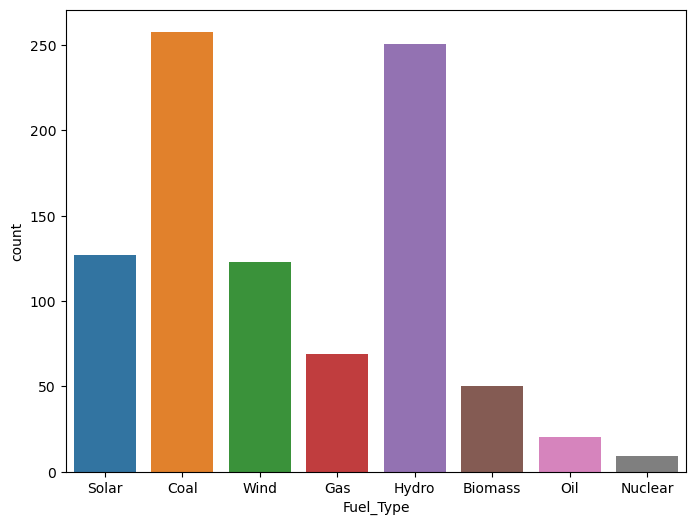

In [43]:
print(df['Fuel_Type'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['Fuel_Type'])
plt.show()

In the above cell the count plot shows the energy source used in primary electricity generation.
Here using the source Coal(thermal) generates more electricity followed by Hydro(water) . Also the energy source Nuclear generates very less electricity compare to other.

-The Data is not balanced so will balance the data later.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


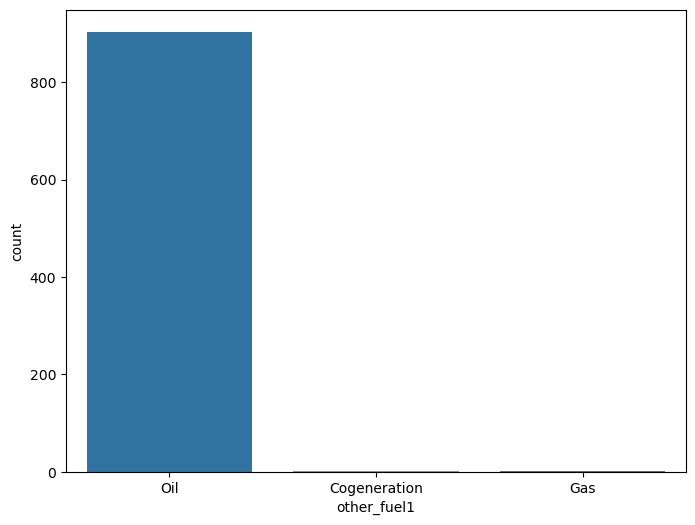

In [44]:
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['other_fuel1'])
plt.show()

Here we can see there are 3 unique values in other_fuel1 and the count of oil is higher than cogeneration and gas.


WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


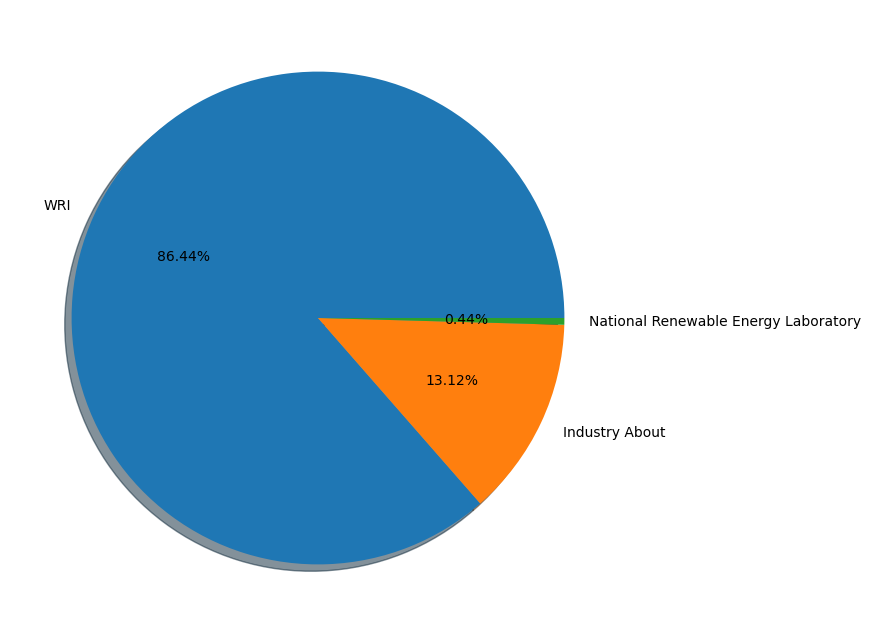

In [45]:
print(df['geolocation_source'].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

As in the above cell the plot shows that the geolocation source World Resources Institute(WRI) has highest counts which means WRI gives the more geolocation information compare to other two sources.


# Distribution of skewness


Plotting Numerical Columns



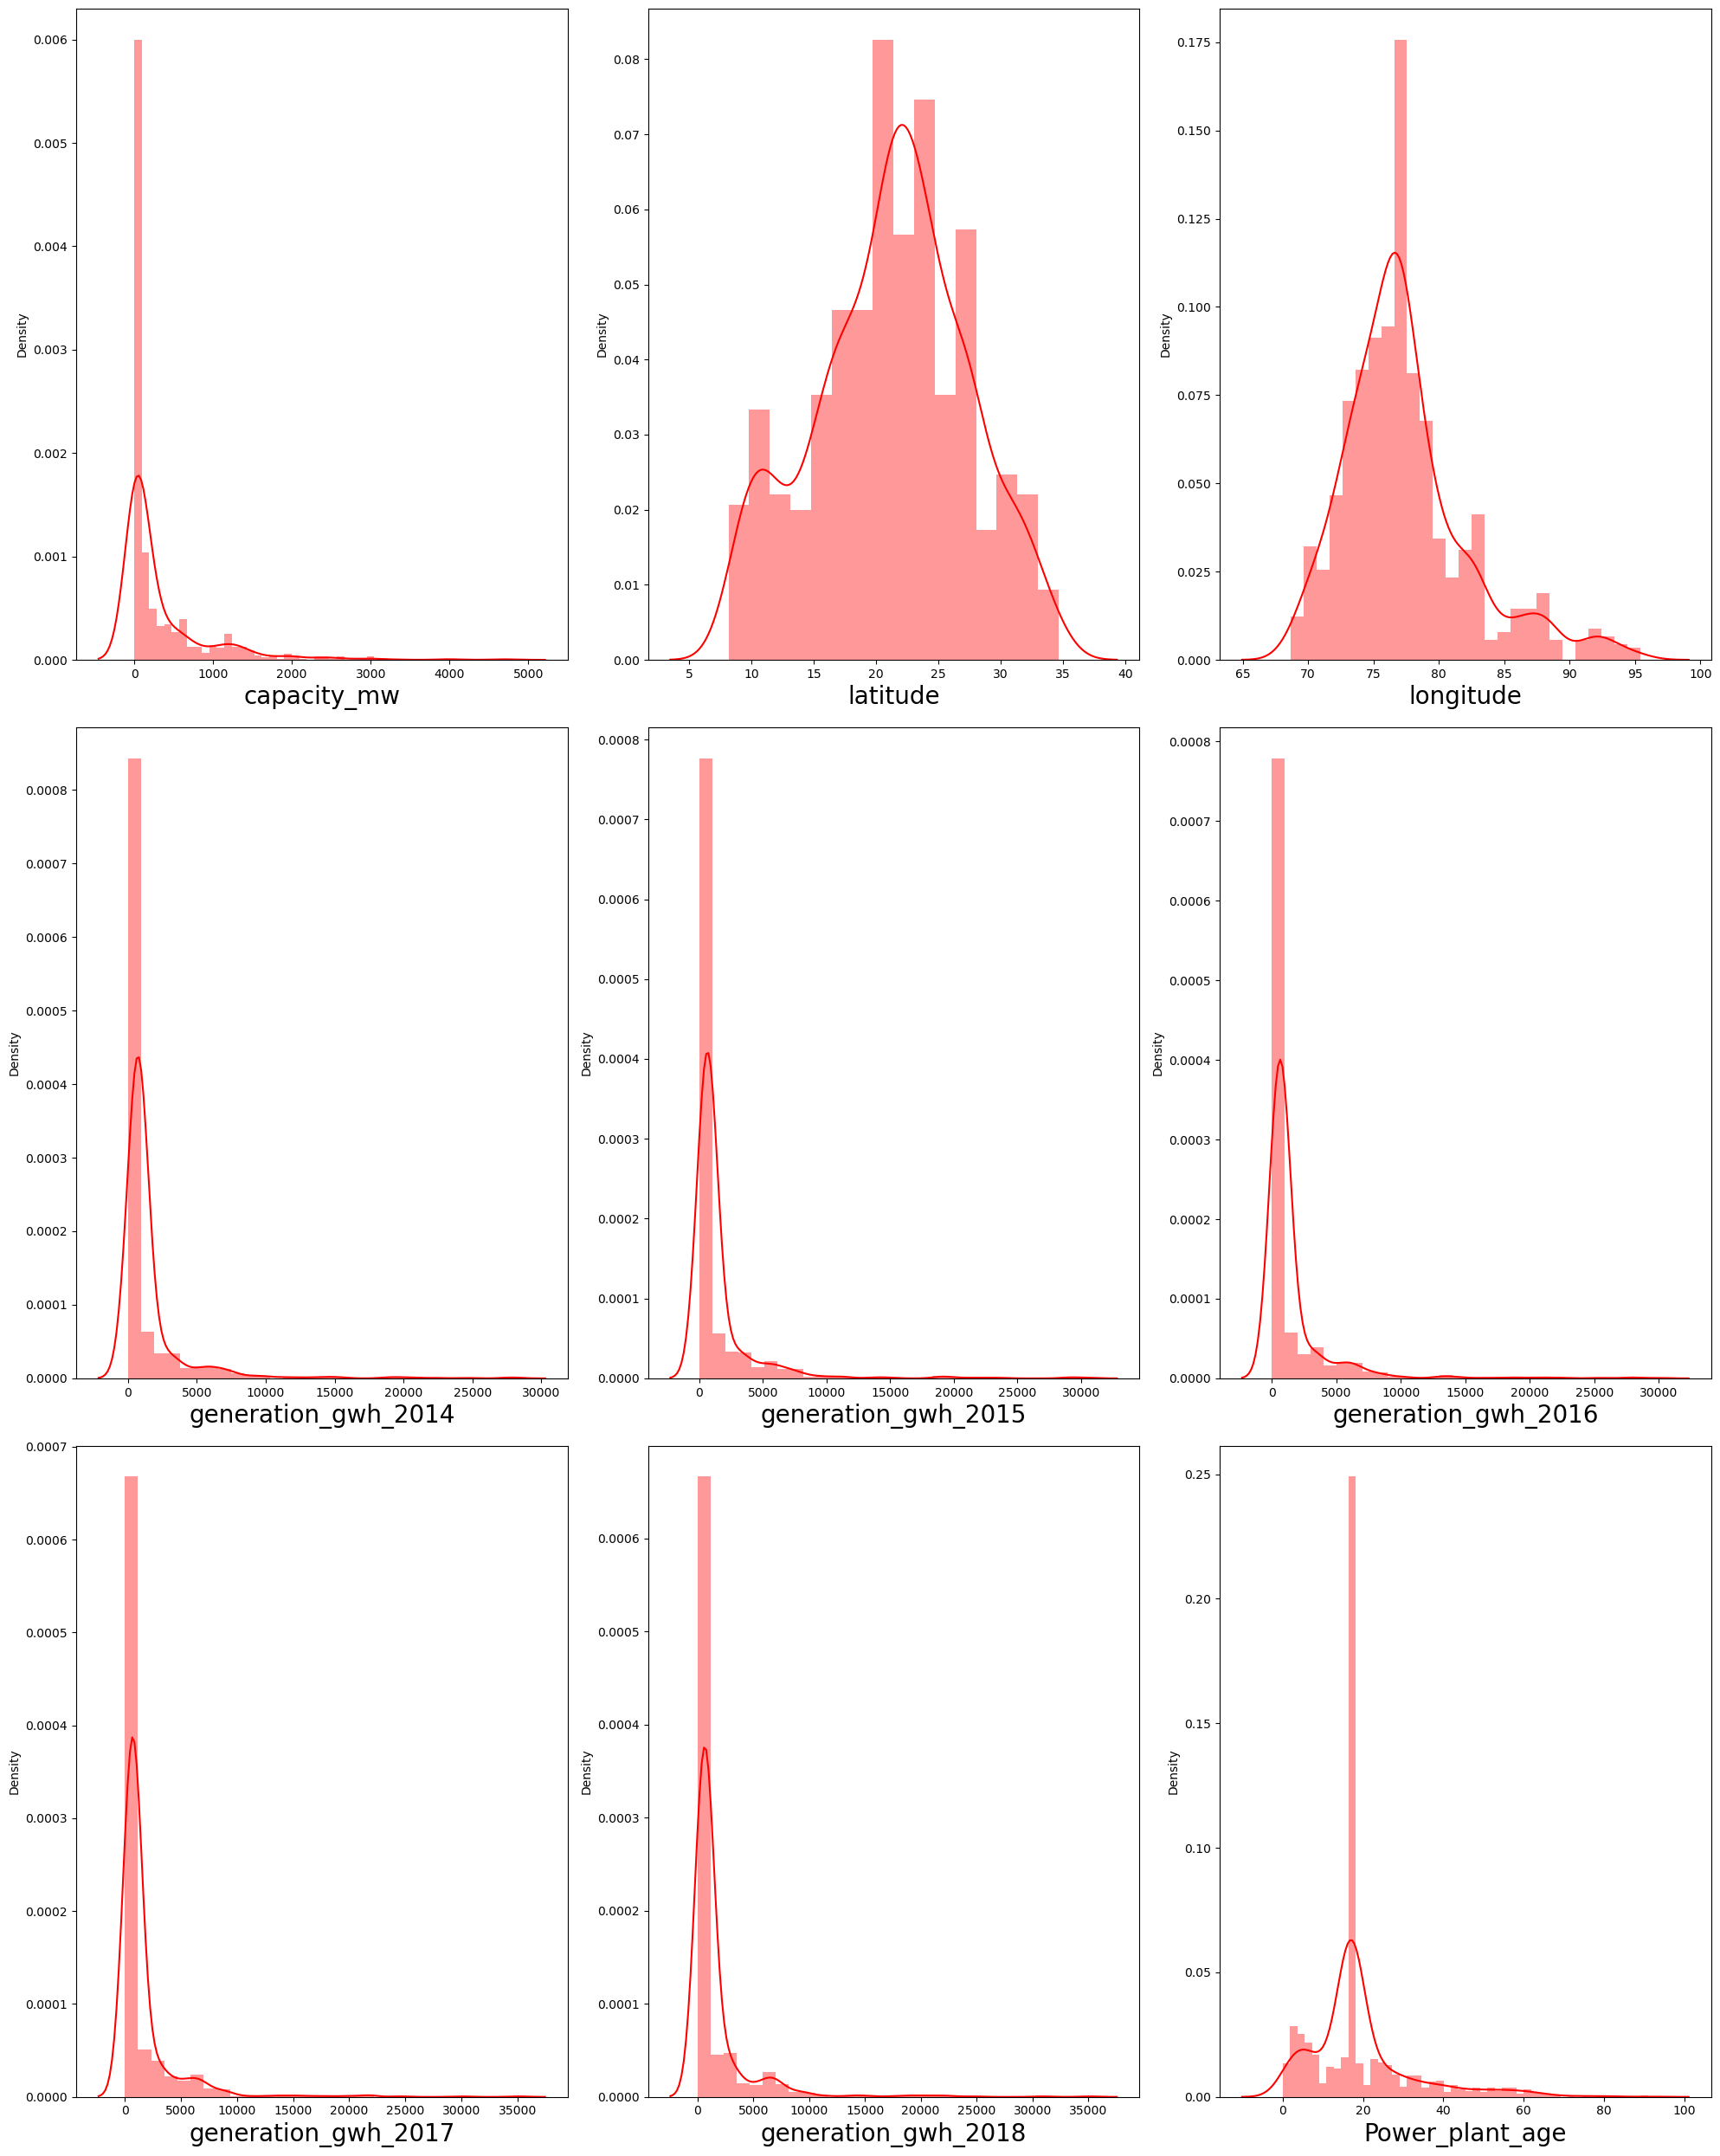

In [46]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Observation :-

- From the above distribution plots we can observe that the data is not normally distributed in all the columns except   latitude and longitude.
- In most of the columns the mean is greater than the median which means they are skewed to right.
- We will remove these skewness in all the coluns except the label in the later part.

# Comparing target varibale capacity_mw with features


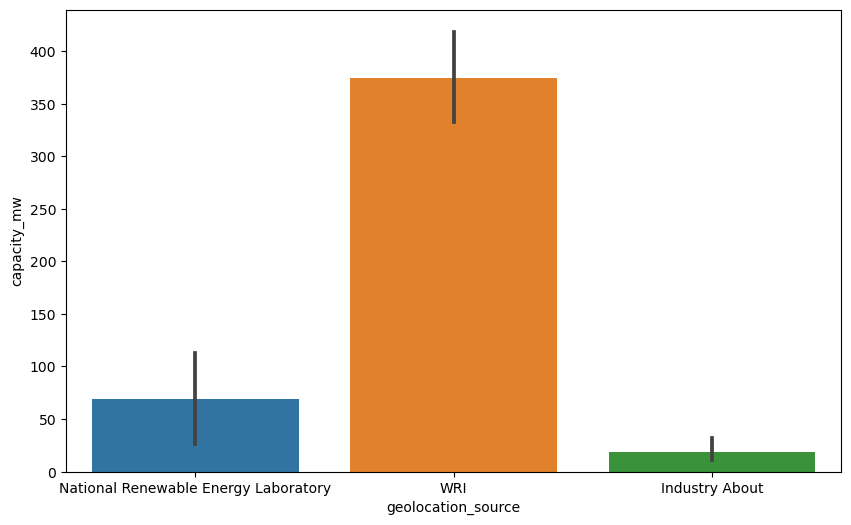

In [47]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'geolocation_source', y = 'capacity_mw', data=df)
plt.show()

The capacity of geolocation source WRI is maximum which has capacity more than 350 mega watts. The geolocation source industry about has less capacity


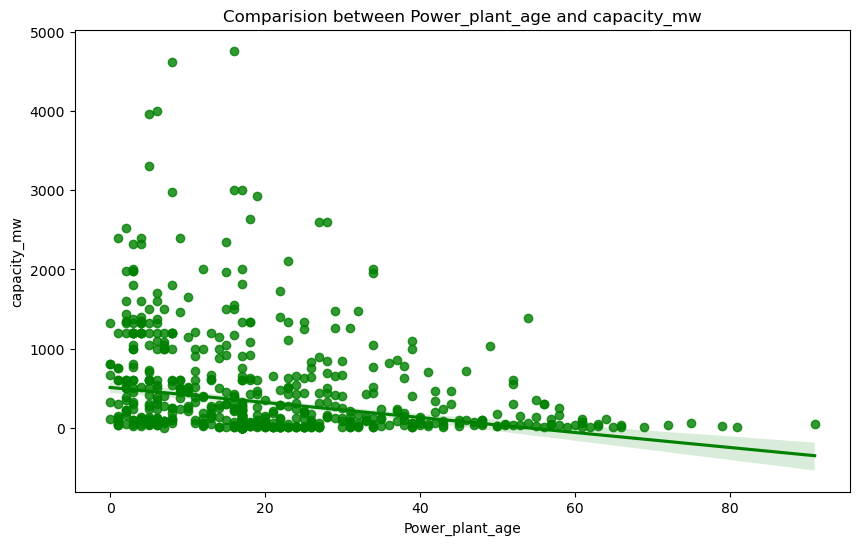

In [48]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = 'g');

From the above plot we can observe that there is negative linear relationship between feature and label also we can infer that the capacity of older power plants is very less compared to the power plants which are started recently.


<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

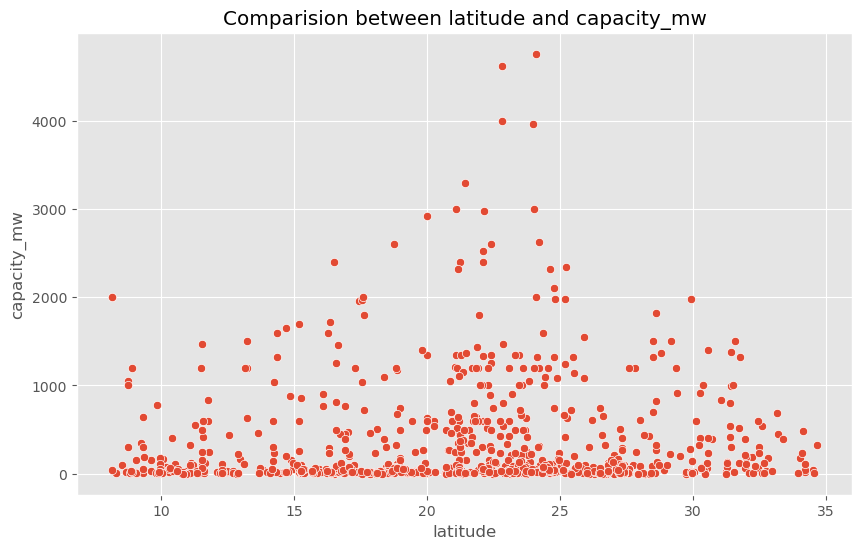

In [49]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df['capacity_mw'])

The plot shows that there is no linear relation between latitude and capacity of the power plant . We can notice the capacity of power plant is very less in this case also we can see some outliers present hear.


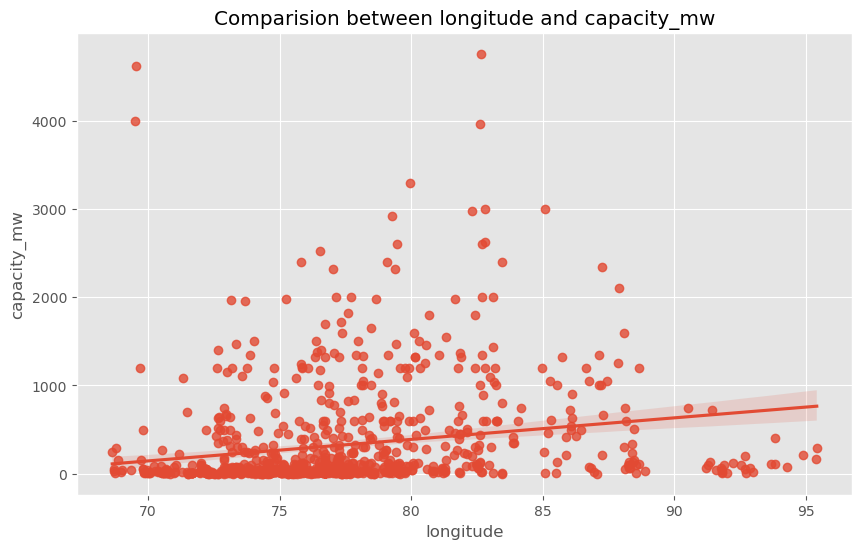

In [50]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df['capacity_mw']);

There is very weak linear relation between longitude and capacity. Here the longitude ranges from 74-82 has more capacity upto 2000. And we can also observe the presence of outliers.


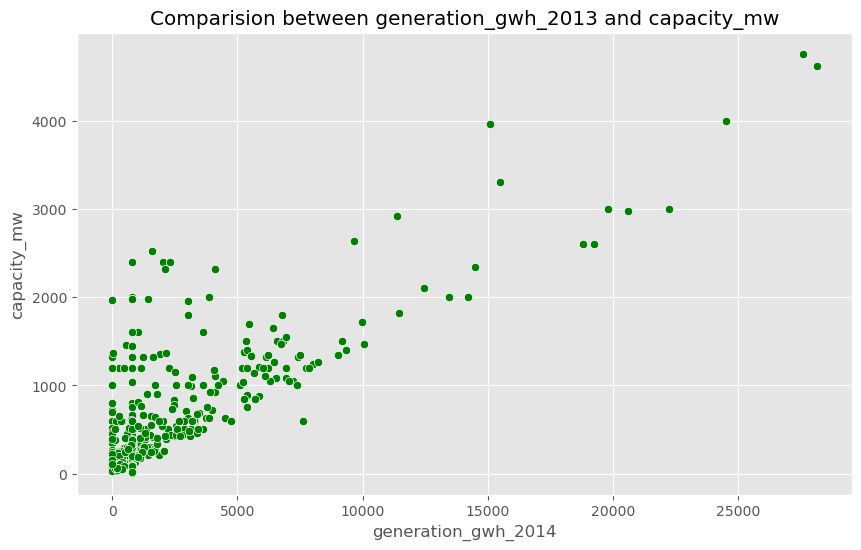

In [51]:
plt.figure(figsize = (10,6))
plt.title('Comparision between generation_gwh_2013 and capacity_mw')
sns.scatterplot(x = 'generation_gwh_2014', y = 'capacity_mw', data = df,color='g')
plt.show()

We can notice the linear relationship between the feature and the label. Here the electricity generation reported for the year 2014 has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

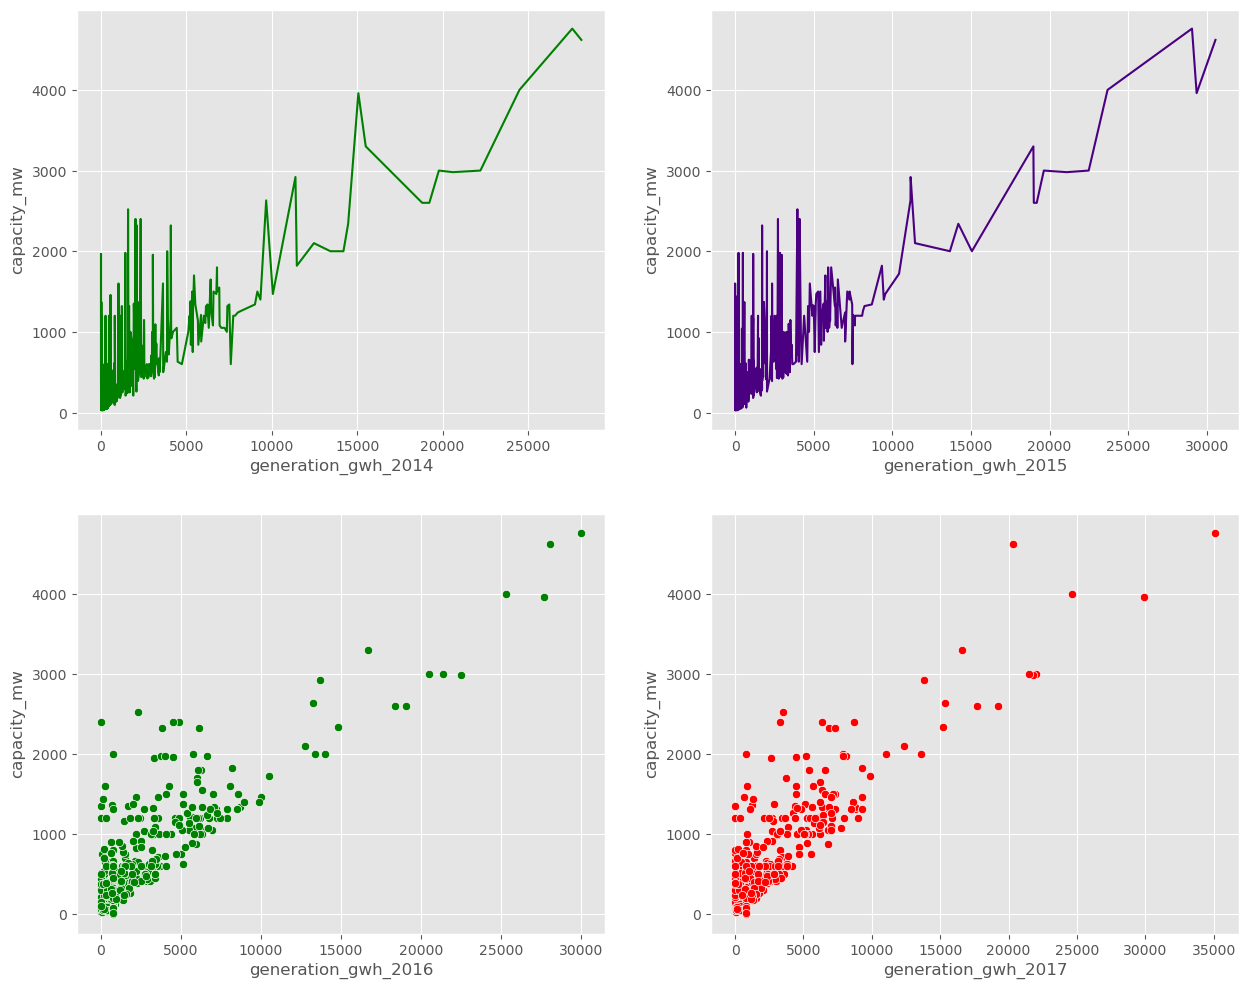

In [52]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# checking attrition level in Dailyrate
sns.lineplot(x='generation_gwh_2014', y='capacity_mw',ax=axes[0,0],data=df,color='g')

# checking attrition level in hourlyrate
sns.lineplot(x='generation_gwh_2015', y='capacity_mw',ax=axes[0,1],data=df,color='indigo')

# checking attrition level in Monthlyrate
sns.scatterplot(x='generation_gwh_2016', y='capacity_mw',ax=axes[1,0],data=df,color='g')

# checking attrition level Monthlyincome
sns.scatterplot(x='generation_gwh_2017', y='capacity_mw',ax=axes[1,1],data=df,color='r')
plt.show()

Observation :-

- There is positive linear relationship between the capacity and the electricity generation reported for the years mentioned.
- The plot shows how the electricity generation reported for the years 2014 , 2015, 2016, 2017 have high capacity of above 1000mw . Also power generation growrh is more than 5000gwh in all the years.
- As the electricity generation growth increases, the capacity of plant is also increasing moderately.

# Comparing the target variable Fuel Types with other features


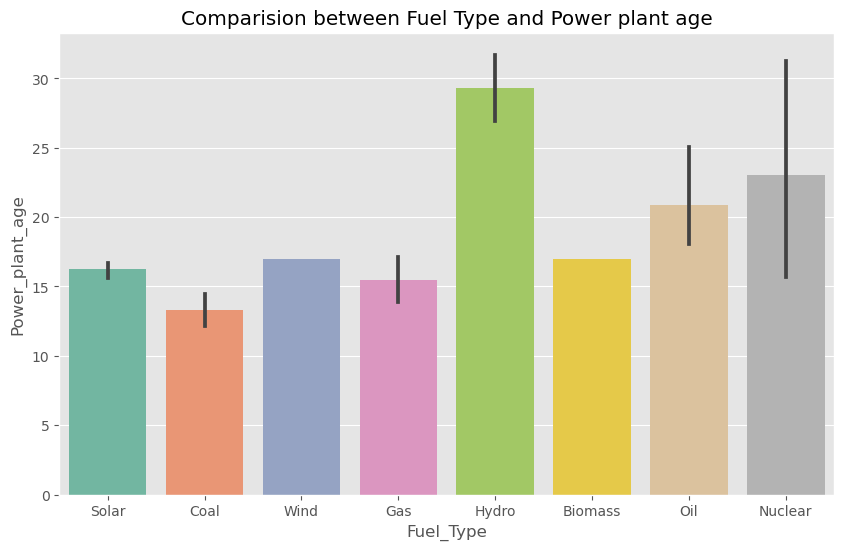

In [53]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and Power plant age")
sns.barplot(x='Fuel_Type',y='Power_plant_age', data=df,palette='Set2')
plt.show()

From the above cell we can see most of the power plants uses Hydro(water) to generate the electricity followed by Nuclear and Oil.
The power plants which are recently constructed uses Solar, Coal and Gas to gererate the power


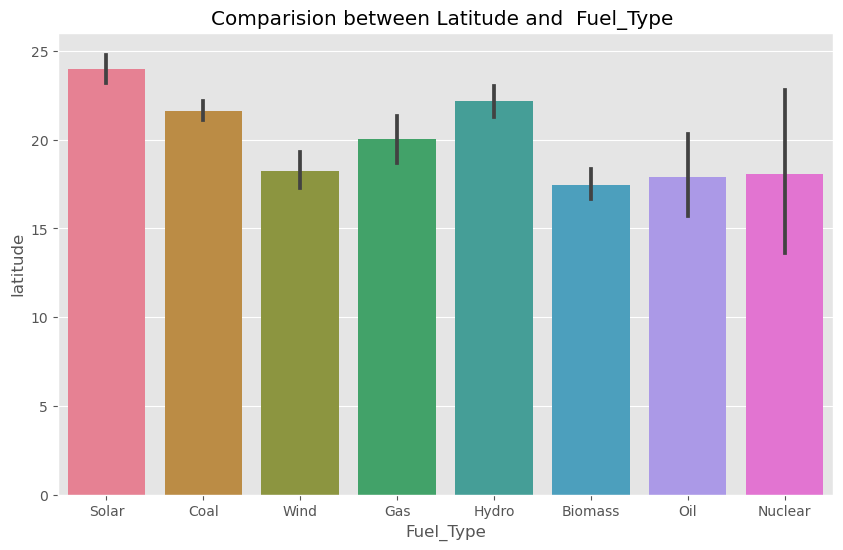

In [54]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Latitude and  Fuel_Type ")
sns.barplot(df['Fuel_Type'],df['latitude'],palette='husl');

So here we can observe that the fuel type Solar has high latitude of above 20 followed by Hydro, Coal and Gas . Apart from these types others have less latitude.


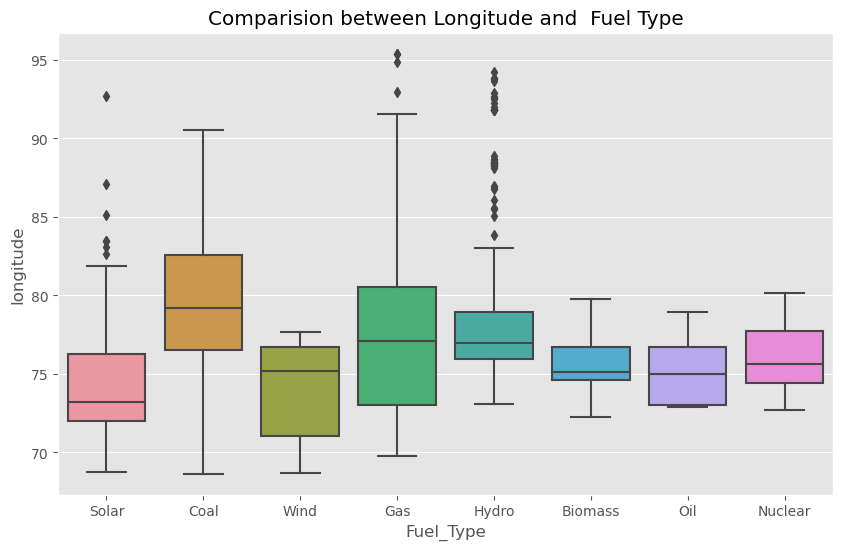

In [55]:
plt.figure(figsize = [10,6])
plt.style.use('ggplot')
plt.title("Comparision between Longitude and  Fuel Type")
sns.boxplot(df['Fuel_Type'],df['longitude']);

The fuel type Gas has high longitude followed by Hydro , Solar and Coal other fuel types have very less longitude.


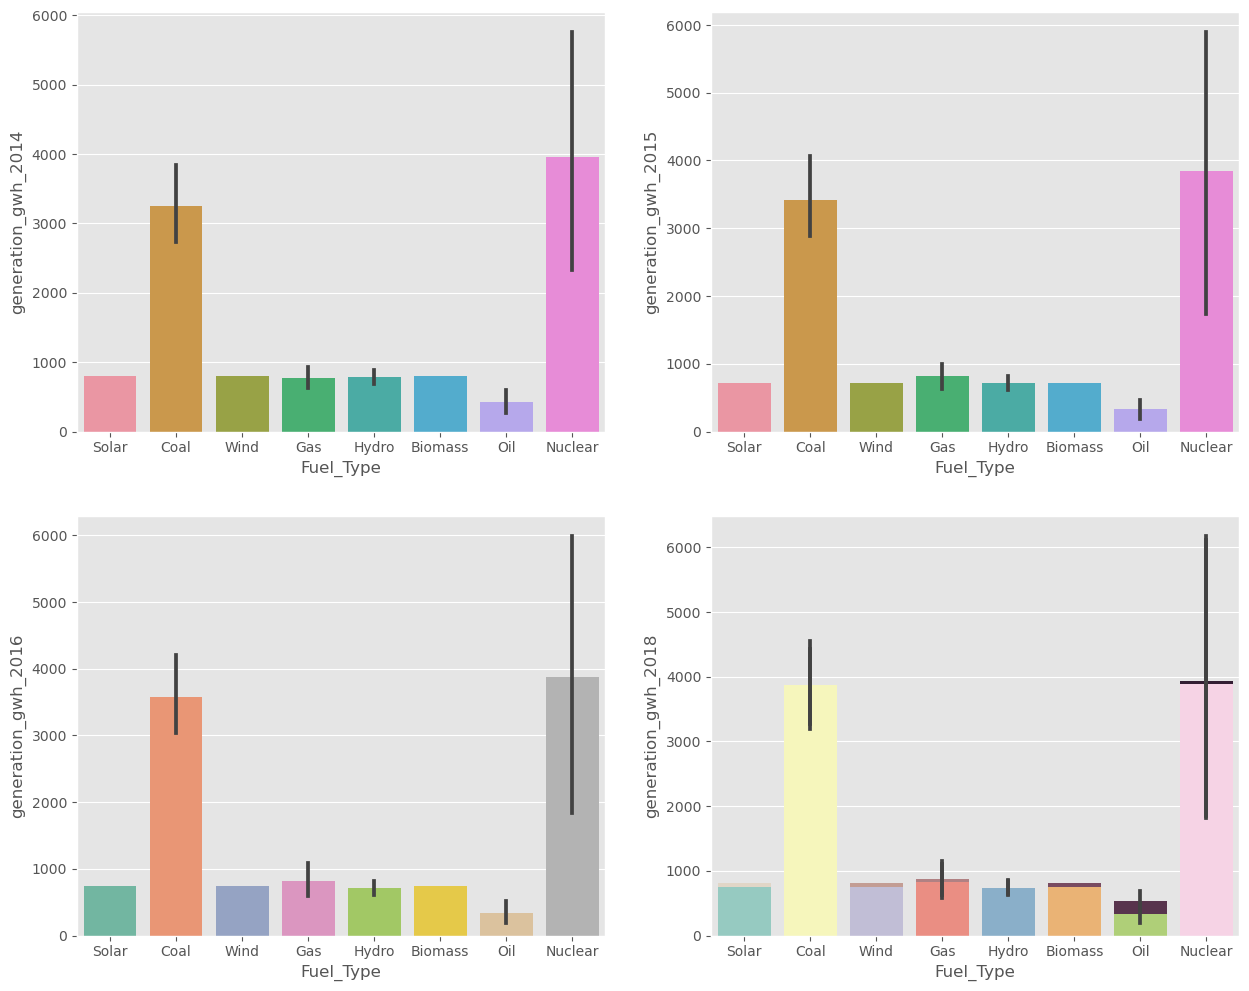

In [56]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

#checking attrition level in Dailyrate
sns.barplot(x='Fuel_Type',y='generation_gwh_2014',ax=axes[0,0],data=df)

# checking attrition level in hourlyrate
sns.barplot(x='Fuel_Type',y='generation_gwh_2015',ax=axes[0,1],data=df)

# checking attrition level in Monthlyrate
sns.barplot(x='Fuel_Type',y='generation_gwh_2016',ax=axes[1,0],data=df,palette="Set2")

# checking attrition level Monthlyincome
sns.barplot(x='Fuel_Type',y='generation_gwh_2017',ax=axes[1,1],data=df,palette="ch:.25")

sns.barplot(x='Fuel_Type',y='generation_gwh_2018',ax=axes[1,1],data=df,palette="Set3")

plt.show()

From the graph we can notice the fuel type Nuclear has high electrical generation reports for all the years followed by Coal.

Other fuel types have very less power generation report

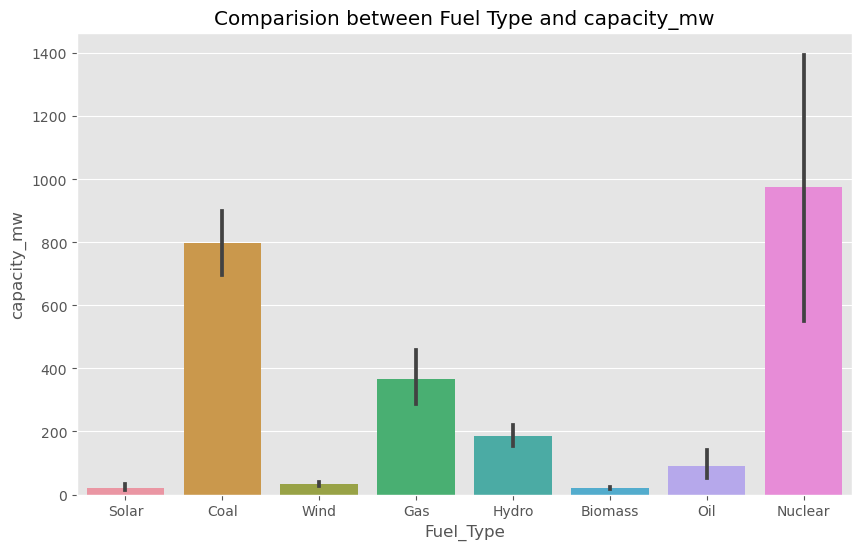

In [57]:
# let's check the relation between fuel type and capacity_mw
plt.figure(figsize=(10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x= 'Fuel_Type',y = 'capacity_mw',data = df)
plt.show()

The plot shows that the capacity of generating electricity is high in Nuclear followed by Coal.
Also the electricity generating capacity is very less in Solar, Biomass, Wind and other plants.

# Multivariate Analysis


Since we have 2 target variables capacity_mw and Fuel_Type, will check the pairwise relation for the features with both the targets separately.



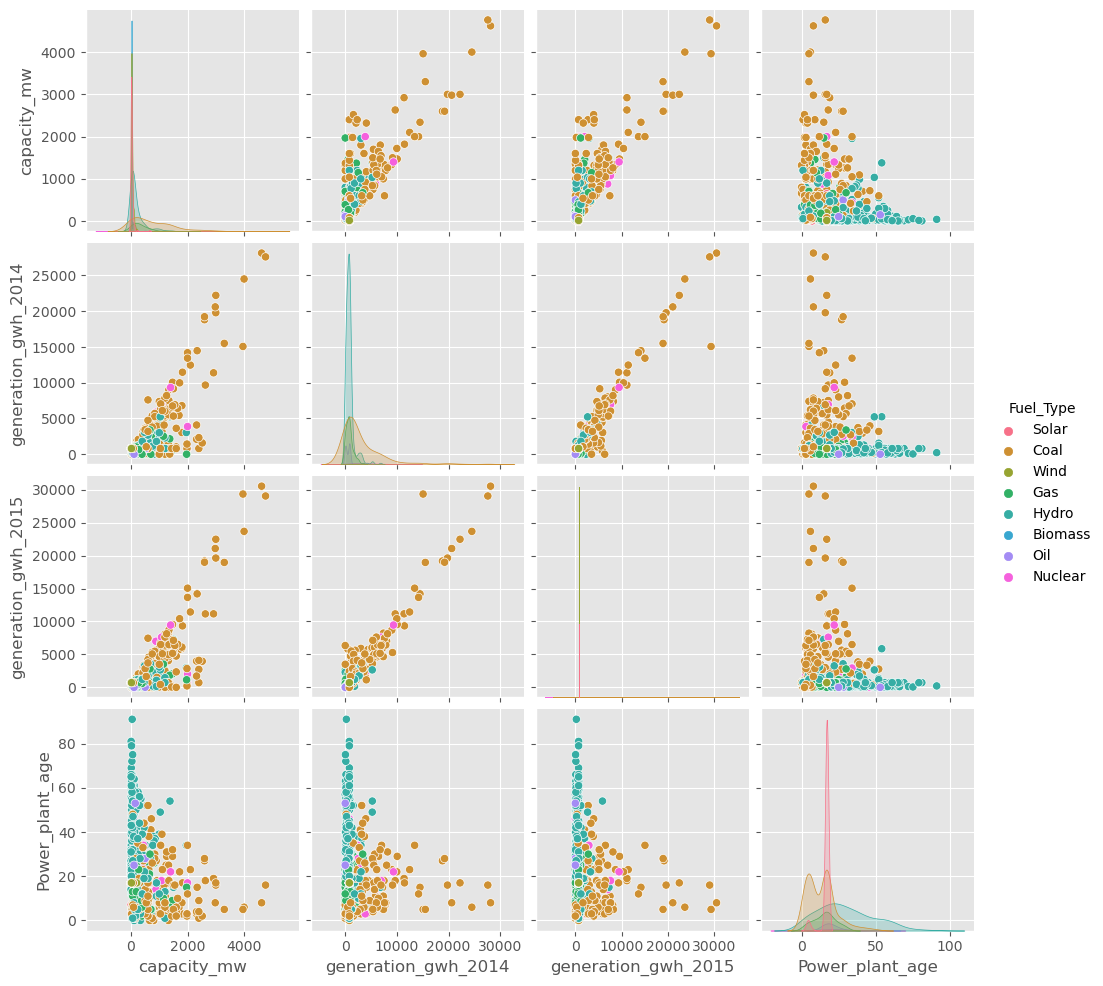

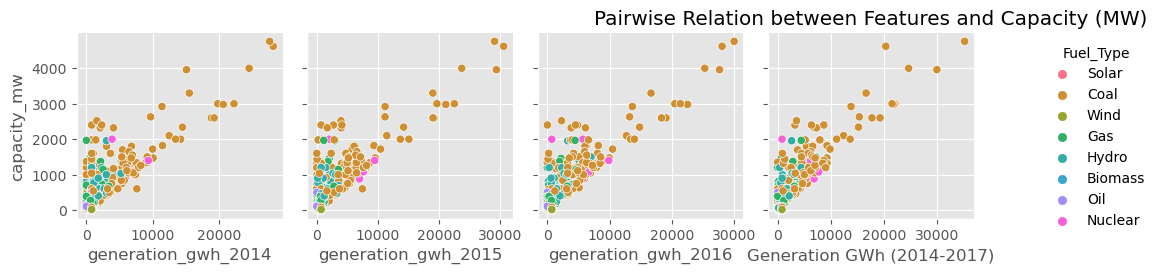

In [58]:
sns.pairplot(df, hue='Fuel_Type', palette='husl', vars=['capacity_mw', 'generation_gwh_2014', 'generation_gwh_2015', 'Power_plant_age'])
plt.show()

sns.pairplot(df, x_vars=['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
             y_vars=['capacity_mw'], hue='Fuel_Type', palette='husl')

# Add labels and a title
plt.xlabel("Generation GWh (2014-2017)")
plt.ylabel("Capacity (MW)")
plt.title("Pairwise Relation between Features and Capacity (MW)")

# Show the pairplot
plt.show()




# Outliers Handling


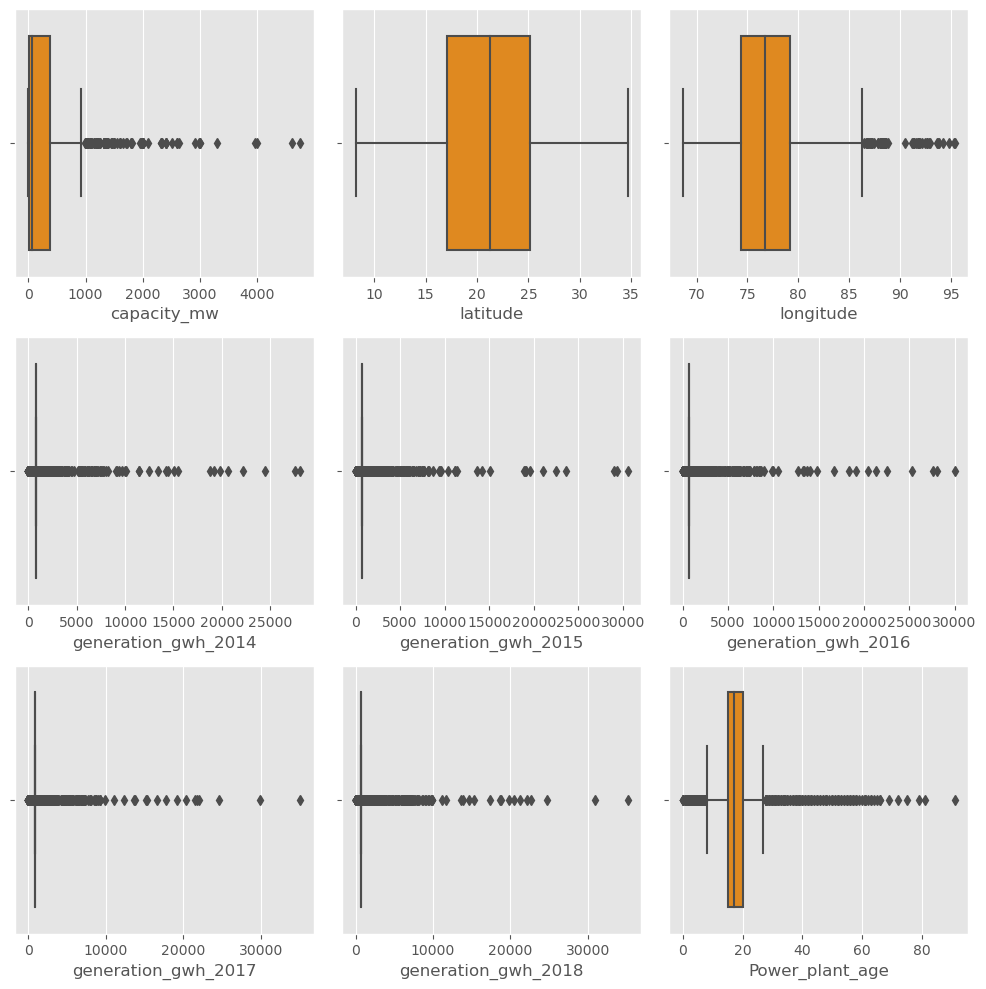

In [59]:
# indentifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='darkorange')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In the boxplot we can notice the outliers present in all columns except latitude. Even target column has outliers but no need to remove it.
Let's remove outliers using ZSCORE method.

# Removing Outliers


# ZSCORE method


In [60]:
# features containing outliers
features = df[['longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']]


In [61]:
from scipy.stats import zscore

z=np.abs(zscore(features))
z

,longitude,generation_gwh_2018,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,0.869917,0.288394,0.257022,0.267783,0.275737,0.275565,0.933076
1,0.585590,0.288394,0.257022,0.267783,0.275737,0.275565,0.172699
2,1.673567,0.288394,0.257022,0.267783,0.275737,0.275565,0.172699
3,2.895239,0.327990,0.322873,0.223348,0.226194,0.326203,0.400812
4,1.035238,1.772608,0.545554,1.476964,1.557432,1.224379,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.308963,0.257022,0.505833,0.443415,0.259992,1.313265
903,0.153415,0.288394,0.257022,0.267783,0.275737,0.275565,0.172699
904,0.383592,0.288394,0.257022,0.267783,0.275737,0.275565,0.172699
905,0.764564,0.288394,0.257022,0.267783,0.275737,0.275565,0.172699


So here we have removed the outliers


In [62]:
# creating new dataframe

new_df= df[(z<3).all(axis=1)]
new_df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


SO here we can see the new dataframe after removing the outliers. Here we have removed the outliers whose zscore is less than 3.

In [63]:
df.shape


(907, 13)

Before removing outliers we had 907 rows and 13 columns in the dataset.


In [64]:
new_df.shape


(851, 13)

After removing the outliers we have 851 rows and 13 columns


In [65]:
# checking the data loss
data_loss = (908-852)/908*100
data_loss

6.167400881057269

Here We are losing only 6% of data by removing outliers using zscore.

Then remove the outliers and check data loss % by using IQR method.

# IQR METHOD(Inter Quantile Range)


In [66]:
Q1 = features.quantile(0.25)

Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1

df1= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [67]:
df1.shape


(420, 13)

So we can notice here that after using IQR method data have 422 rows and 13 columns


In [68]:
# let's check the dataloss
data_loss = (908-422)/908*100
data_loss

53.524229074889874

we can observe here that using IQR method we are losing 53% of data which is huge. so considering zscore method for better result.

# Encoding the categorical columns using Label Encoding


In [69]:
categorical_col = ['Fuel_Type', 'other_fuel1','source','geolocation_source']


In [70]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(LE.fit_transform)

SO here encoding the categorical columns using label encoder.


In [71]:
new_df[categorical_col]


,Fuel_Type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


Now we have encoded the categorical columns using label encoding method.


# Correlation between the target variable and features using HEAT MAP

In [72]:
# checking the correlation between features and the target
cor = new_df.corr()
cor


,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
Fuel_Type,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


This gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.


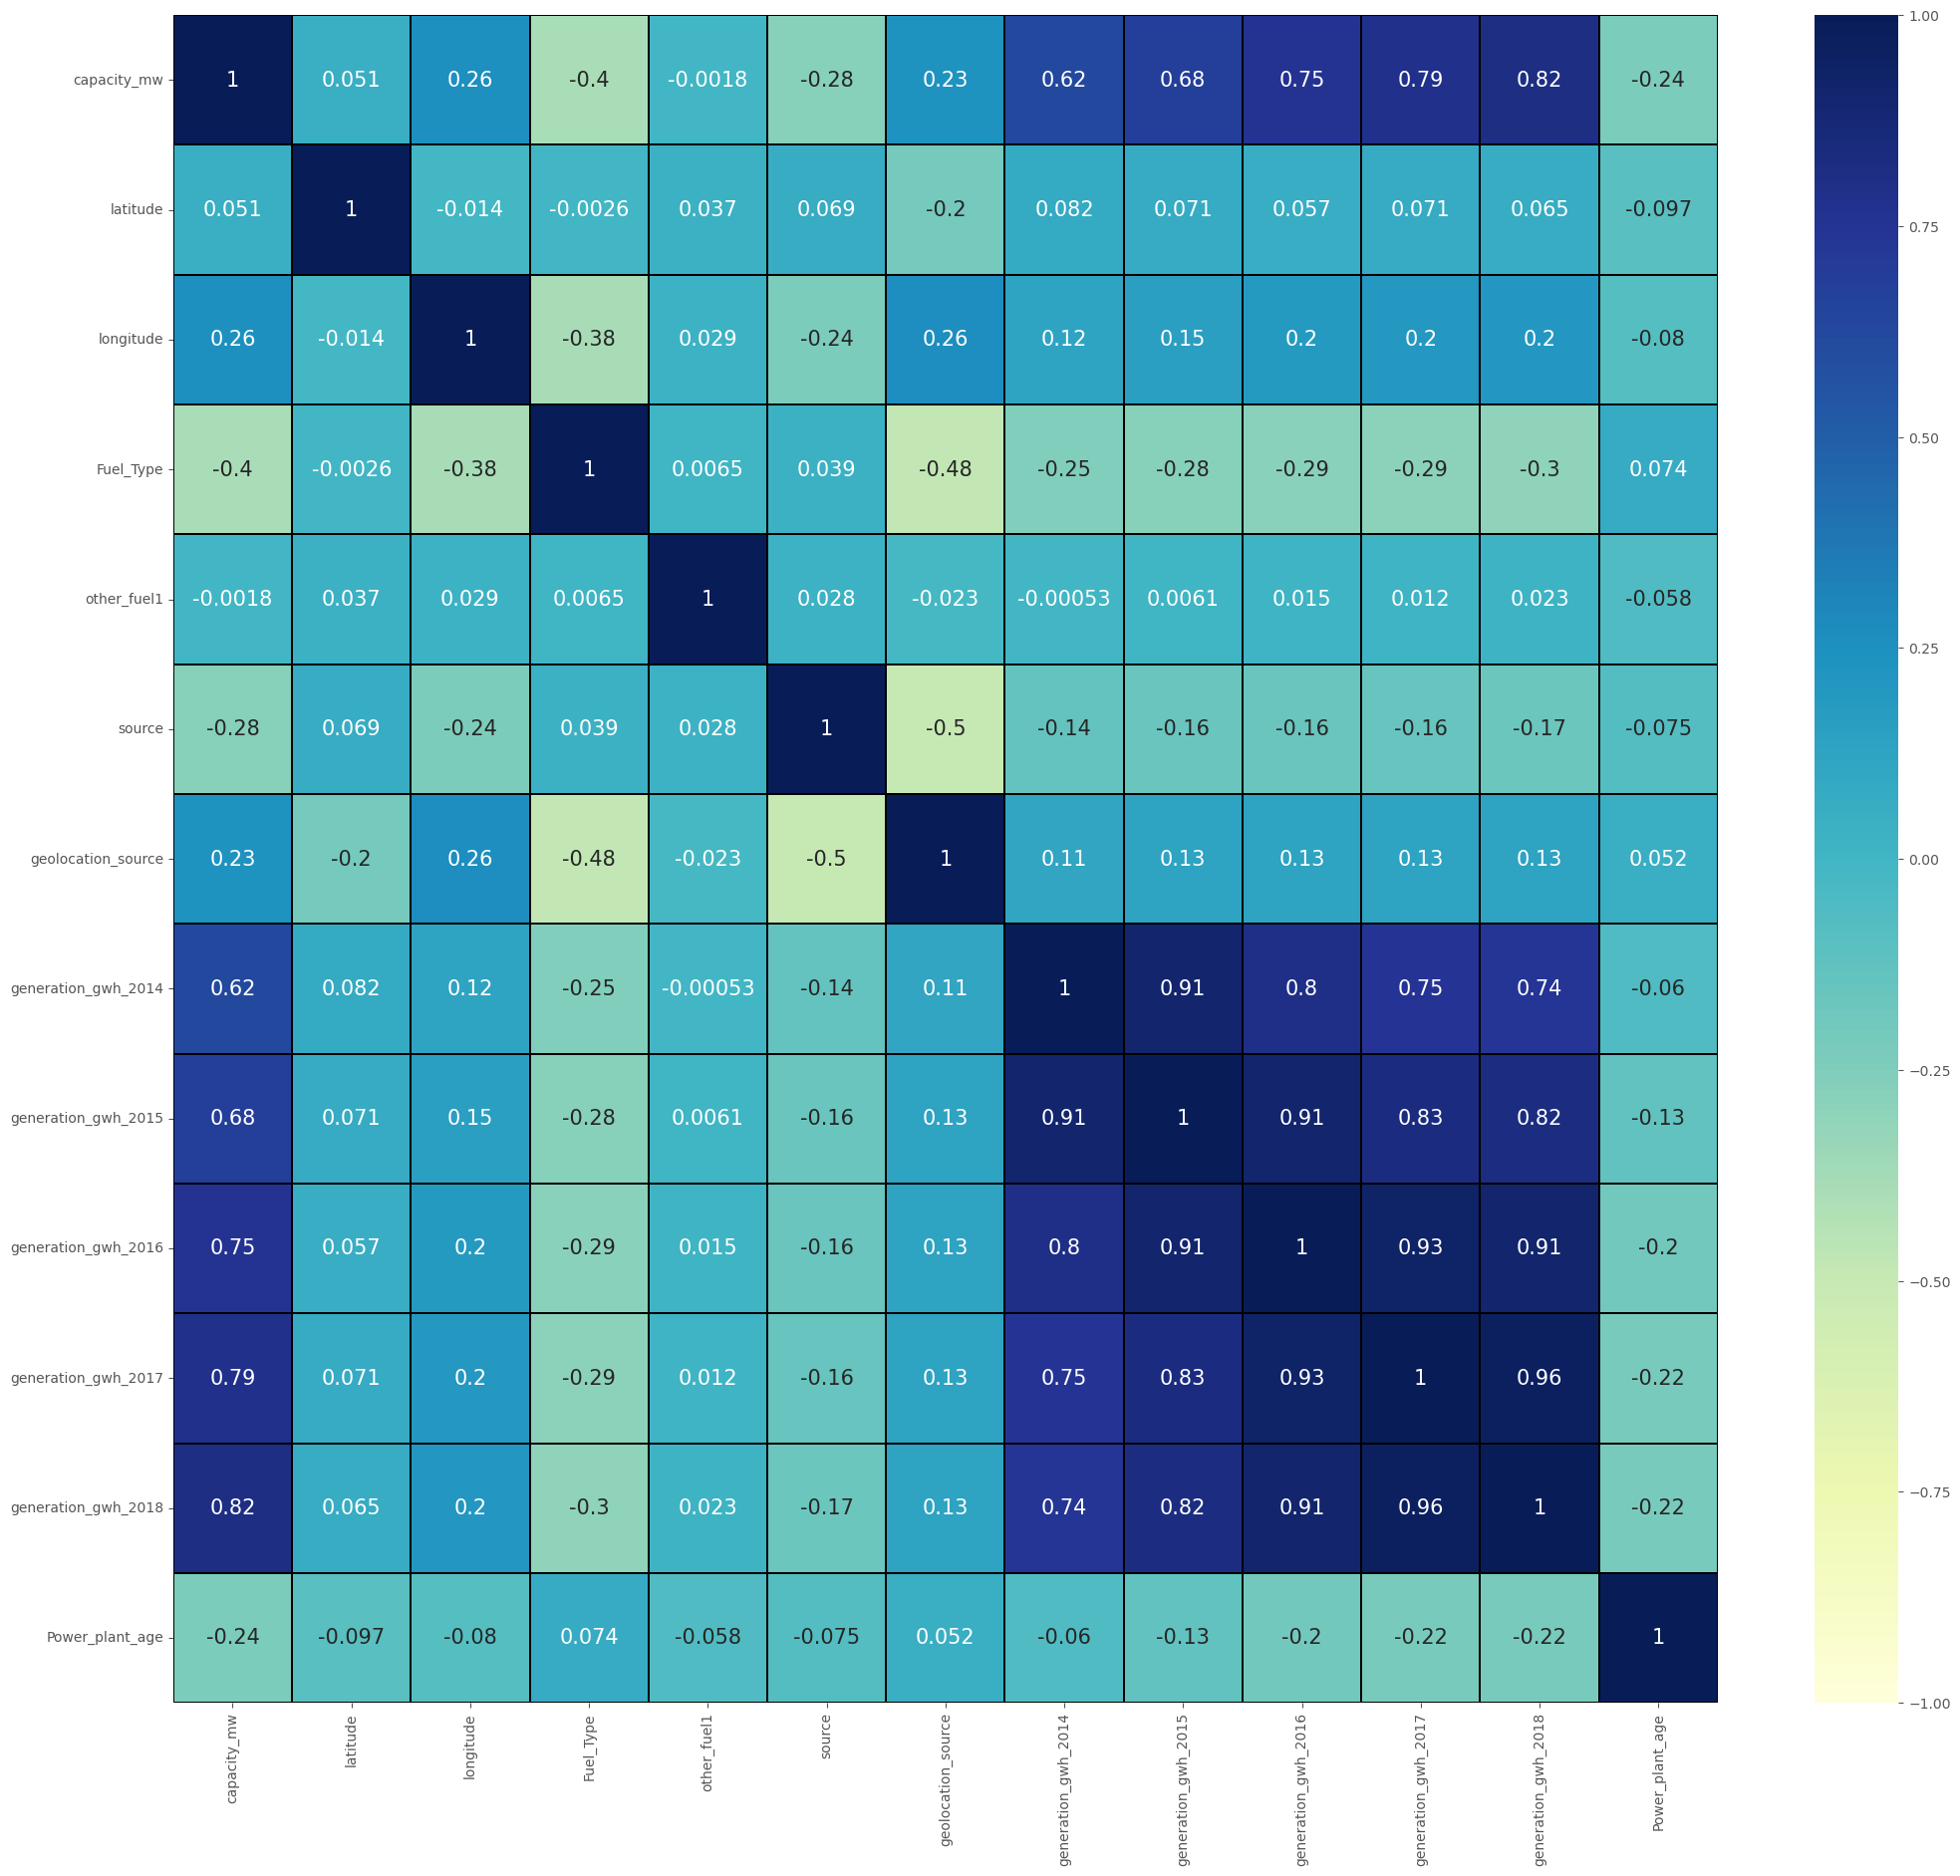

In [73]:
# visualizing the correlation matrix by plotting heat map

plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

This heatmap Shows the correlation matrix by visualizing the data .

We can observe the relation between feature to feature and feature to label.
This heat map contains both positive and negative correlation.
Correlation between capacity_mw and features

The label capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014 , generation_gwh_2013.
& the label is negatively correlated with the features Fuel_Type, source and Power_plant_age.
The columns other_fuel1 and latitude have no relation with the label, so we can drop them.
Correlation between Fuel_Type and features

The label Fuel_Type is less correlate with Power_plant_age and source
The label is negatively correlated with geolocation_souce, longitude, capacity_mw and all generation_gwh years
From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearty problem. So will try to solve this problem by Checking VIF value befor building our models.
Also the features other_fuel1 and latitude have very less correlation with both the labels . Let's drop those columns.

# Visualizing the correlation between label and features using bar plot


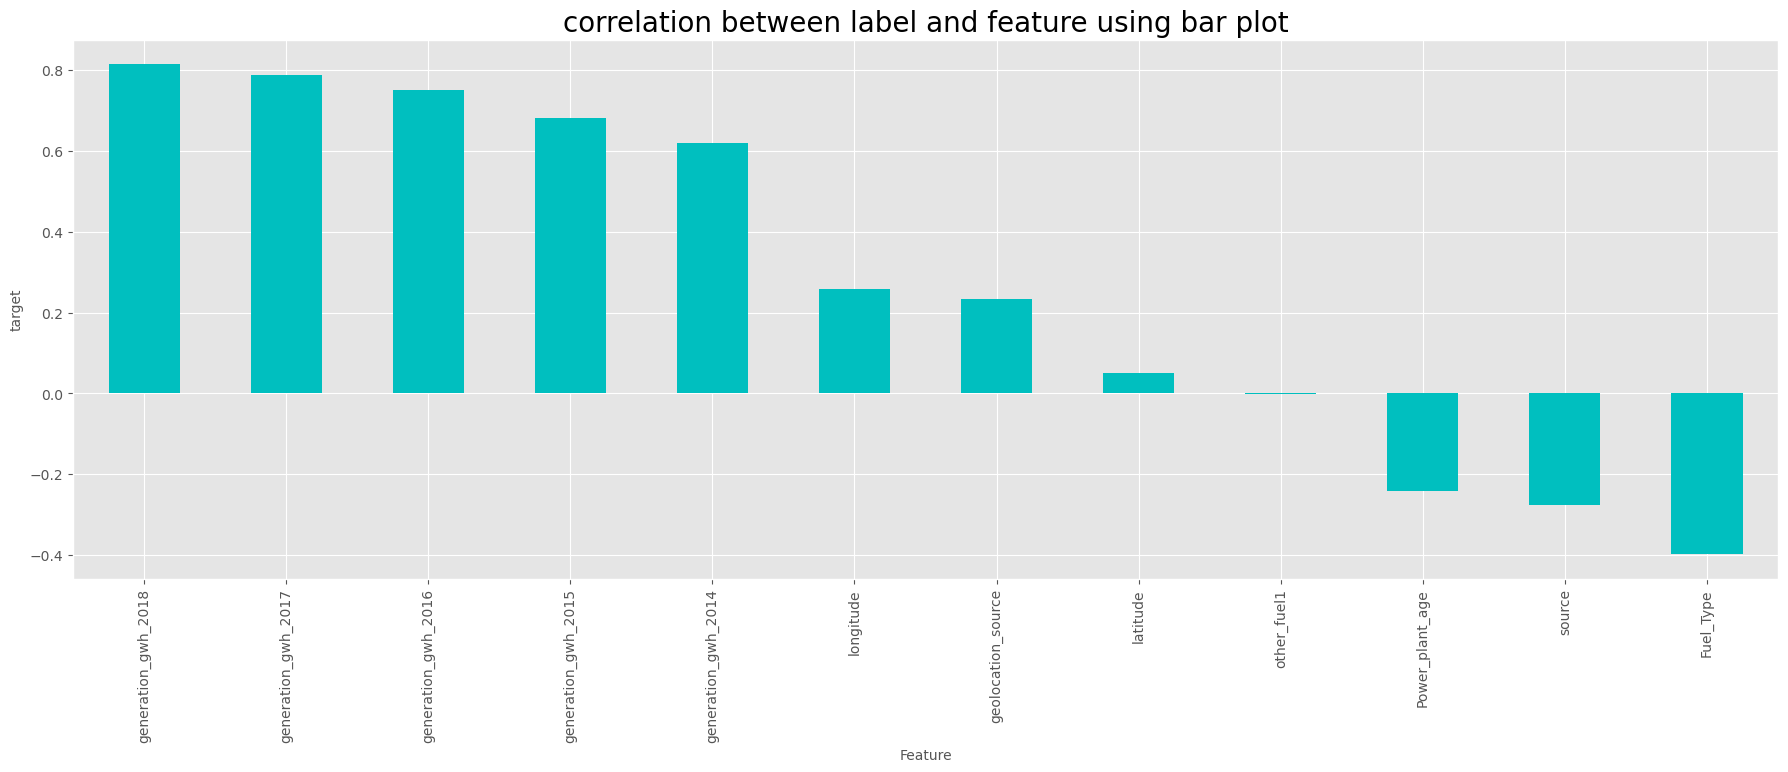

In [74]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

This is the bar plot to check the correlation between capacity_mw and features . Here we can easily notice the positive and negative correlation between the features and the label.


# Visualizing the correlation between label and features using bar plot


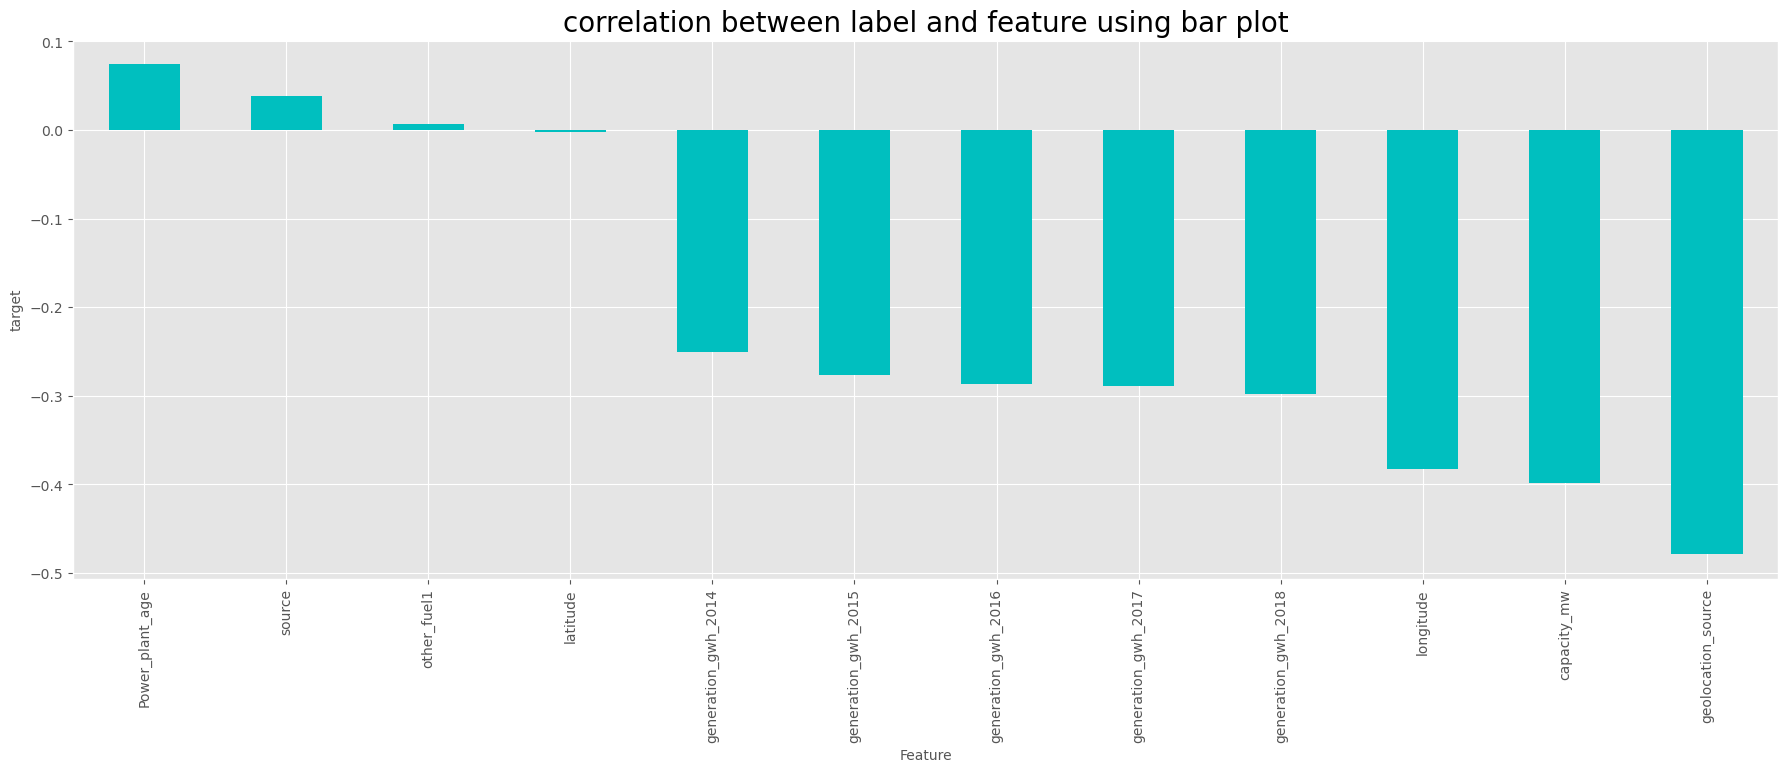

In [75]:
plt.figure(figsize=(22,7))
new_df.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

This is the bar plot to check the correlation between Fuel_Type and features. Here we can easily notice the positive and negative correlation between the features and the label.

From both the bar plots we can observe that the columns other_fuel1 and latitude have very less correlation with both the labels capacity_mw and Fuel_Type.

Let's drop those columns.

In [76]:
# dropping irrelevant columns
new_df.drop('other_fuel1',axis=1,inplace=True)
new_df.drop('latitude',axis=1,inplace=True)

In [77]:
new_df.head()


,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


SO here is the new data frame after removing unnecessary columns.


# 1. Prediction for capacity_mw


# Separating the features and label variables into x and y


In [78]:
x= new_df.drop('capacity_mw',axis=1)
y= new_df['capacity_mw']

In [79]:
x.shape


(851, 10)

In [80]:
y.shape


(851,)

So here we can see the dimension of x and y


# Checking for SKEWNESS


In [81]:
x.skew()


longitude              0.945877
Fuel_Type              0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

The following columns have skewness more than +/-0.5

longitude

generation_gwh_2013

generation_gwh_2014

generation_gwh_2015

generation_gwh_2016

generation_gwh_2017

Power_plant_age

Also the columns - source and geolocation_source are categorical so no need to remove skewness in these columns.

# Removing skewness using yeo_johnson method


In [82]:
skew = ['longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [83]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2018,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.922012,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,-1.081421
1,-0.499829,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,0.046187
2,-2.377759,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,0.046187
3,2.430594,-0.194159,-0.268922,0.093773,0.105691,-0.199692,-0.245810
4,1.261979,2.347272,1.426798,2.286603,2.276671,1.983083,-1.758384


In [84]:
# checking skewness after using yeo-johnson method
x.skew()

longitude             -0.000128
Fuel_Type              0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

SO here successfully removed the skewness from all the numerical columns using yeo-johnson method.


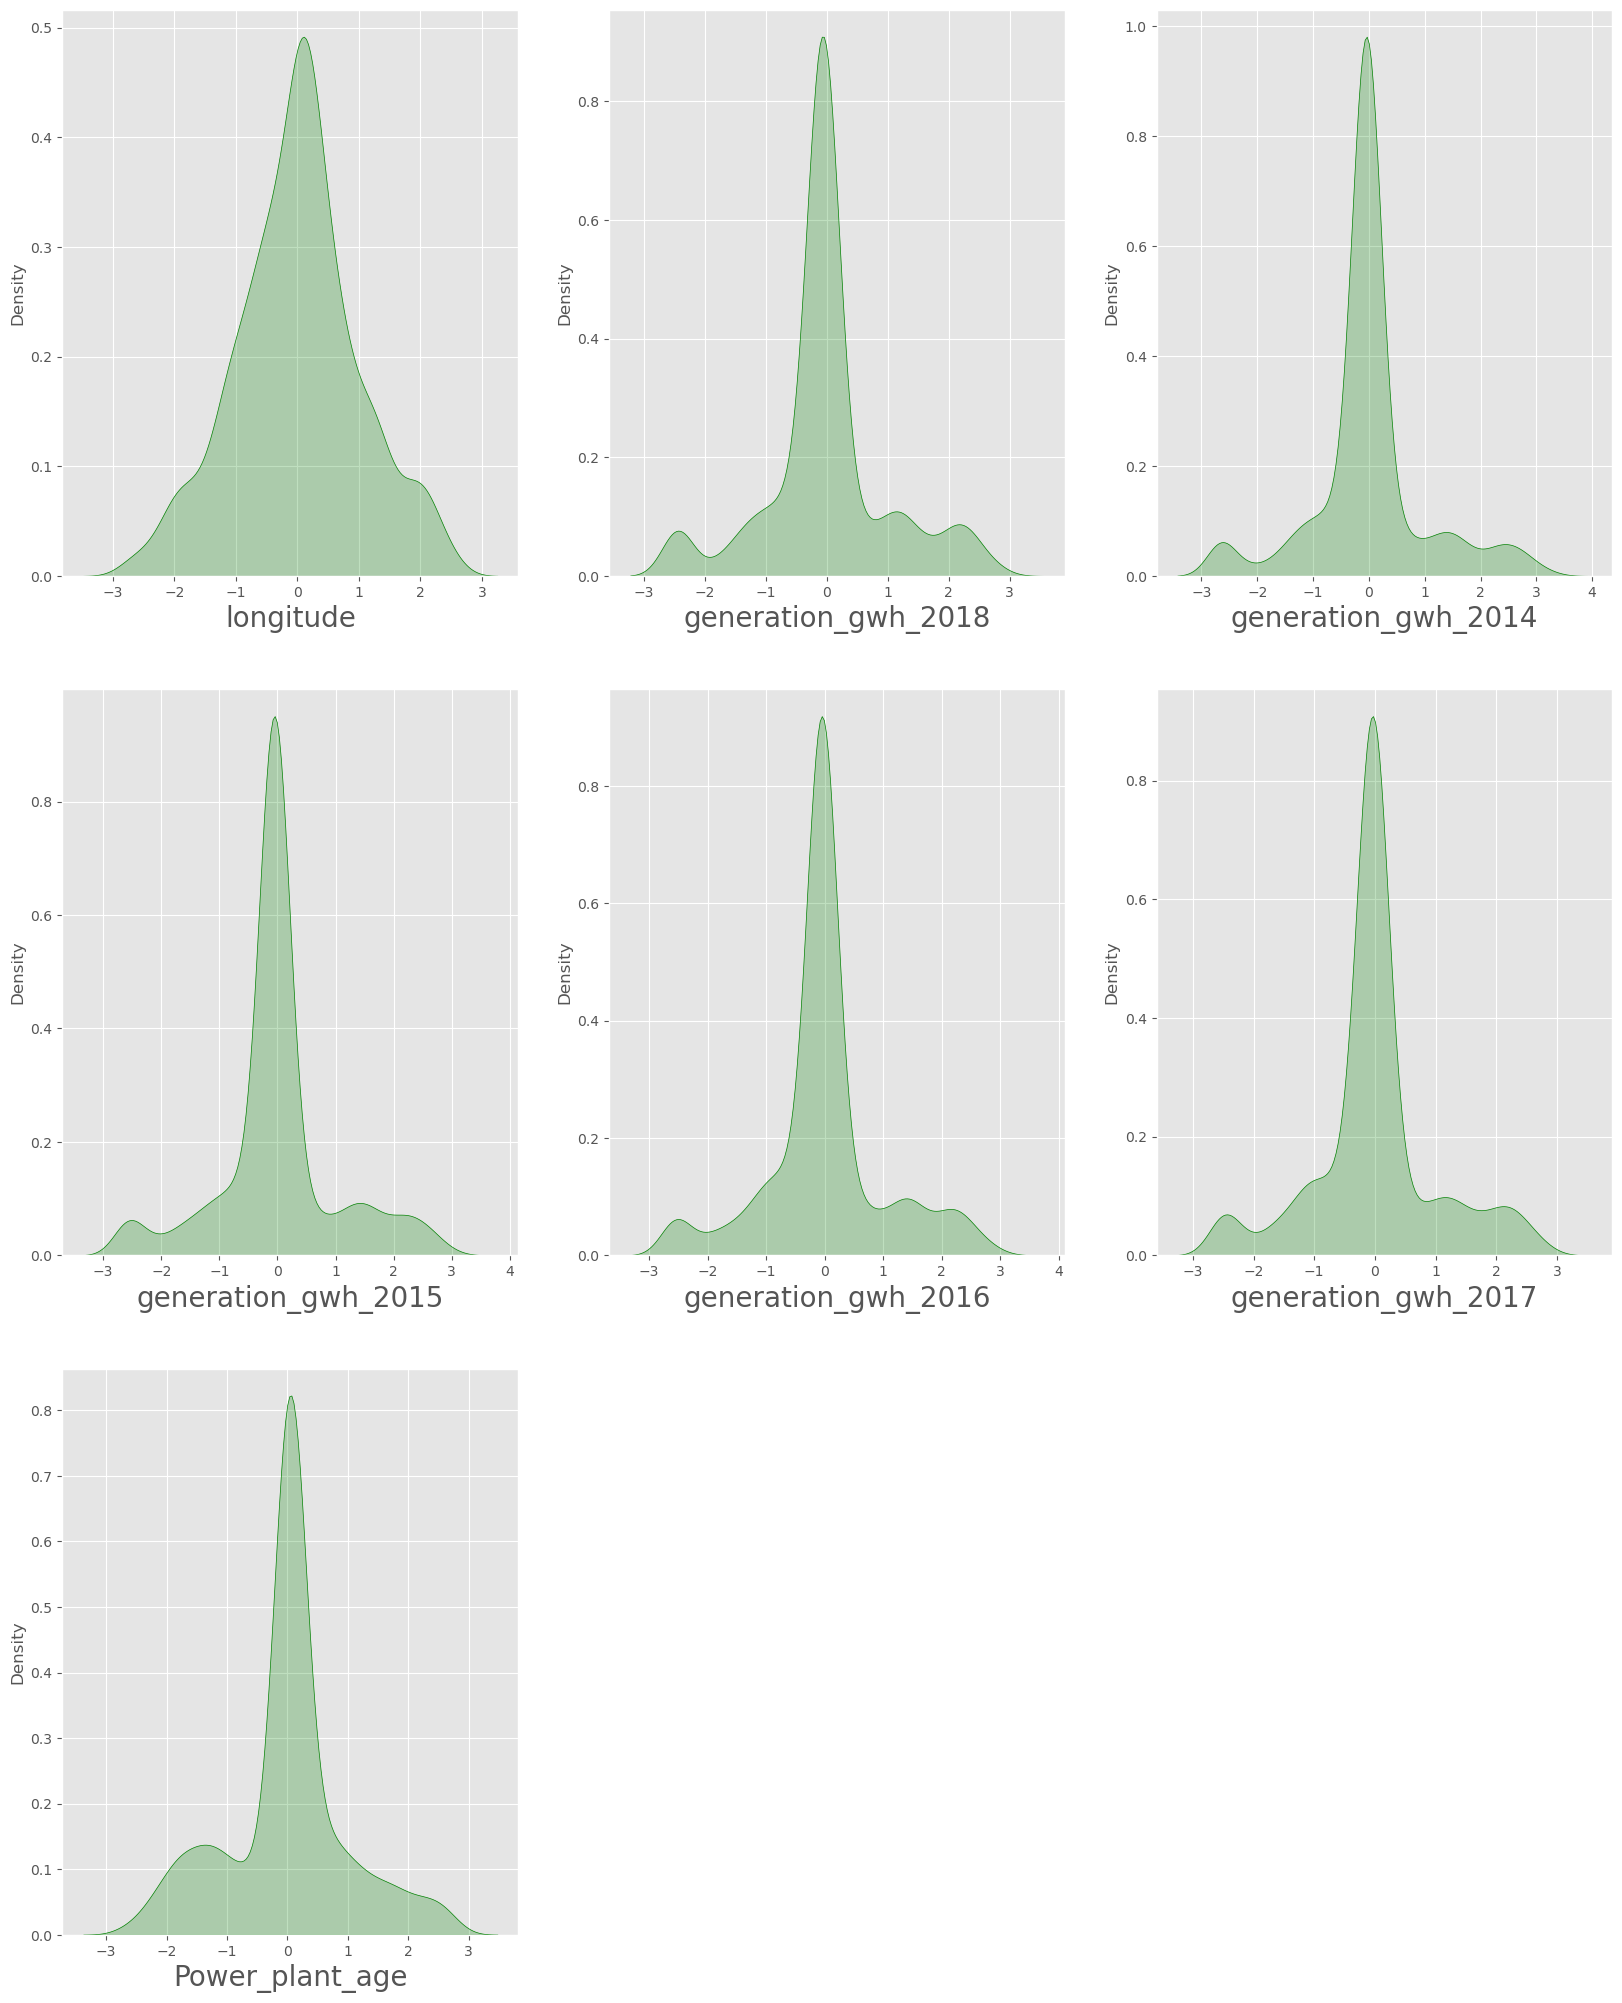

In [85]:
# checking how the data has been distributed in each columns.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={'shade': True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is not normal but the skewness has been reduced in all the columns


In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,0.421592,1.175506,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.224400,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,-0.760624,-0.975797,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


So here scaled the data using standard scalarization method to overcome with the issue of data biasness.

As we have observed in the heat map there is multicolinearity issue exists in the data. So let's check the VIF value and if the columns have VIF > 10 then we can drop those columns.

# Checking VIF (Variance Inflation Factor ) Values


In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]
vif['features'] = x.columns

# let's check the values
vif

,VIF values,features
0,1.309948,longitude
1,1.682645,Fuel_Type
2,1.503721,source
3,1.875750,geolocation_source
4,3.603333,generation_gwh_2014
5,6.182235,generation_gwh_2015
6,9.957776,generation_gwh_2016
7,9.750143,generation_gwh_2017
8,8.951489,generation_gwh_2018
9,1.102659,Power_plant_age


SO here we can observe all the columns have VIF less than 10 .

Which means we are free from multicolinearity problem .

Let's move to building machine learning models.

In [88]:
# DataFrame after preprocessing and data cleaning
x.head()


,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In the above cell we can see the dataframe after cleaning and preprocessing.

Here We have done with the preprocessing and data cleaning .
-Now let's move to build the model.

# Modeling

Finding best random state



In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [90]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8631488241835692  on Random_state  185


So here we are getting the maximum R2 Score as 85% on the Random State 85.


# Creating new train test split


In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)


# Regression Algorithms


In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Random Forest Regressor


In [93]:
# checking r2 score for random forest regressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',metrics.mean_absolute_error(y_test,predRFR))
print('MSE:',metrics.mean_squared_error(y_test,predRFR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predRFR)))

R2_Score: 0.8671761506640294
MAE: 81.0977708065499
MSE: 25093.76819798033
RNSE: 158.4101265638669


The R2 score value for Random Forest Regressor model is 87%


# Decision Tree Regressor


In [94]:
# checking r2 score for decision tree regressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',metrics.mean_absolute_error(y_test,predDTR))
print('MSE:',metrics.mean_squared_error(y_test,predDTR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predDTR)))

R2_Score: 0.6754521022884831
MAE: 116.638154296875
MSE: 61315.26646027637
RNSE: 247.6191964696525


So here the r2 score for Decision Tree Regressor is 69%


# KNeighbors Regressor


In [95]:
# checking r2 score for Kneighbors regressor
knn = KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test,predknn))
print('MSE:',metrics.mean_squared_error(y_test,predknn))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predknn)))

R2_Score: 0.7918940464635293
MAE: 103.55416406249999
MSE: 39316.45246520969
RNSE: 198.28376752828177


So here r2 score for KNN is 80%


# Gradient Boosting Regressor


In [96]:
# checking r2 score for gradient boosting regressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test,predGB))
print('MSE:',metrics.mean_squared_error(y_test,predGB))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predGB)))

R2_Score: 0.8519870933088516
MAE: 90.2521268639614
MSE: 27963.36342746779
RNSE: 167.22249677441067


So here r2 score for Gradient Boosting Regressor is 85%


# Bagging Regressor


In [97]:
# checking r2 score for bagging regressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',metrics.mean_absolute_error(y_test,predBR))
print('MSE:',metrics.mean_squared_error(y_test,predBR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predBR)))

R2_Score: 0.8410946973071722
MAE: 87.80101795532516
MSE: 30021.2111841261
RNSE: 173.26630135178075


So here r2 score for Bagging Regressor is 83%


# Checking the cross validation score


In [98]:
# checking cv score for Random Forest Regressor
print(cross_val_score(RFR,x,y,cv=5).mean())


0.783622952430799


In [99]:
# checking cv score for Decision Tree Regressor
print(cross_val_score(DTR,x,y,cv=5).mean())

0.5905637212094238


In [100]:
# checking cv score for KNN Regressor
print(cross_val_score(knn,x,y,cv=5).mean())

0.7246075187248919


In [101]:
# checking cv score for Gradient Boosting Regressor
print(cross_val_score(GB,x,y,cv=5).mean())

0.752136549733946


In [102]:
# checking cv score for Bagging Regressor
print(cross_val_score(BR,x,y,cv=5).mean())

0.7546355207048216


From the above observation the difference between R2 score and the Cross Validation score we conclude that Random Forest Regressor as our best model.
Let's increase the accuracy of the model by using Hyper Parameter Tuning.

# Hyper Parameter Tuning


In [103]:
from sklearn.model_selection import GridSearchCV

# Random Forest Regressor
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [104]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)


In [105]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [106]:
GCV.best_params_


{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

So these are the best parameters value of RandomForestRegressor.


In [107]:
capacity = RandomForestRegressor(criterion='mse',max_depth=6, max_features='log2', n_estimators=200)
capacity.fit(x_train,y_train)
pred = capacity.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 158.4101265638669
R2_Score: 87.5647740382192


After tuning the model the R2 Score is increased by 1% and we are getting R2 Score as 85% for Random Forest Regressor. which is good.

# Saving the Model


In [108]:
import joblib
joblib.dump(capacity,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

# 2. Prediction for Fuel_Type


# Separating the features and label variables into x_df and y_df


In [109]:
x_df = new_df.drop("Fuel_Type", axis=1)
y_df = new_df["Fuel_Type"]

In [110]:
x_df.shape


(851, 10)

In [111]:
y_df.shape


(851,)

Here is the dimension of x and y


# Checking for Skewness


In [112]:
x_df.skew()


capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

We can observe the skewness in al the columns but the columns source and geolocation_source are categorical so no need to remove skewness in these coluns

In [113]:
skew = ['capacity_mw','longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [114]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2018,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-1.677389,-0.922012,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,-1.081421
1,0.220284,-0.499829,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,0.046187
2,-0.274381,-2.377759,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,0.046187
3,0.391670,2.430594,-0.194159,-0.268922,0.093773,0.105691,-0.199692,-0.245810
4,1.731859,1.261979,2.347272,1.426798,2.286603,2.276671,1.983083,-1.758384


In [115]:
# checking skewness after using yeo-johnson method
x_df.skew()

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

Now we have removed the skewness in all the numerical columns


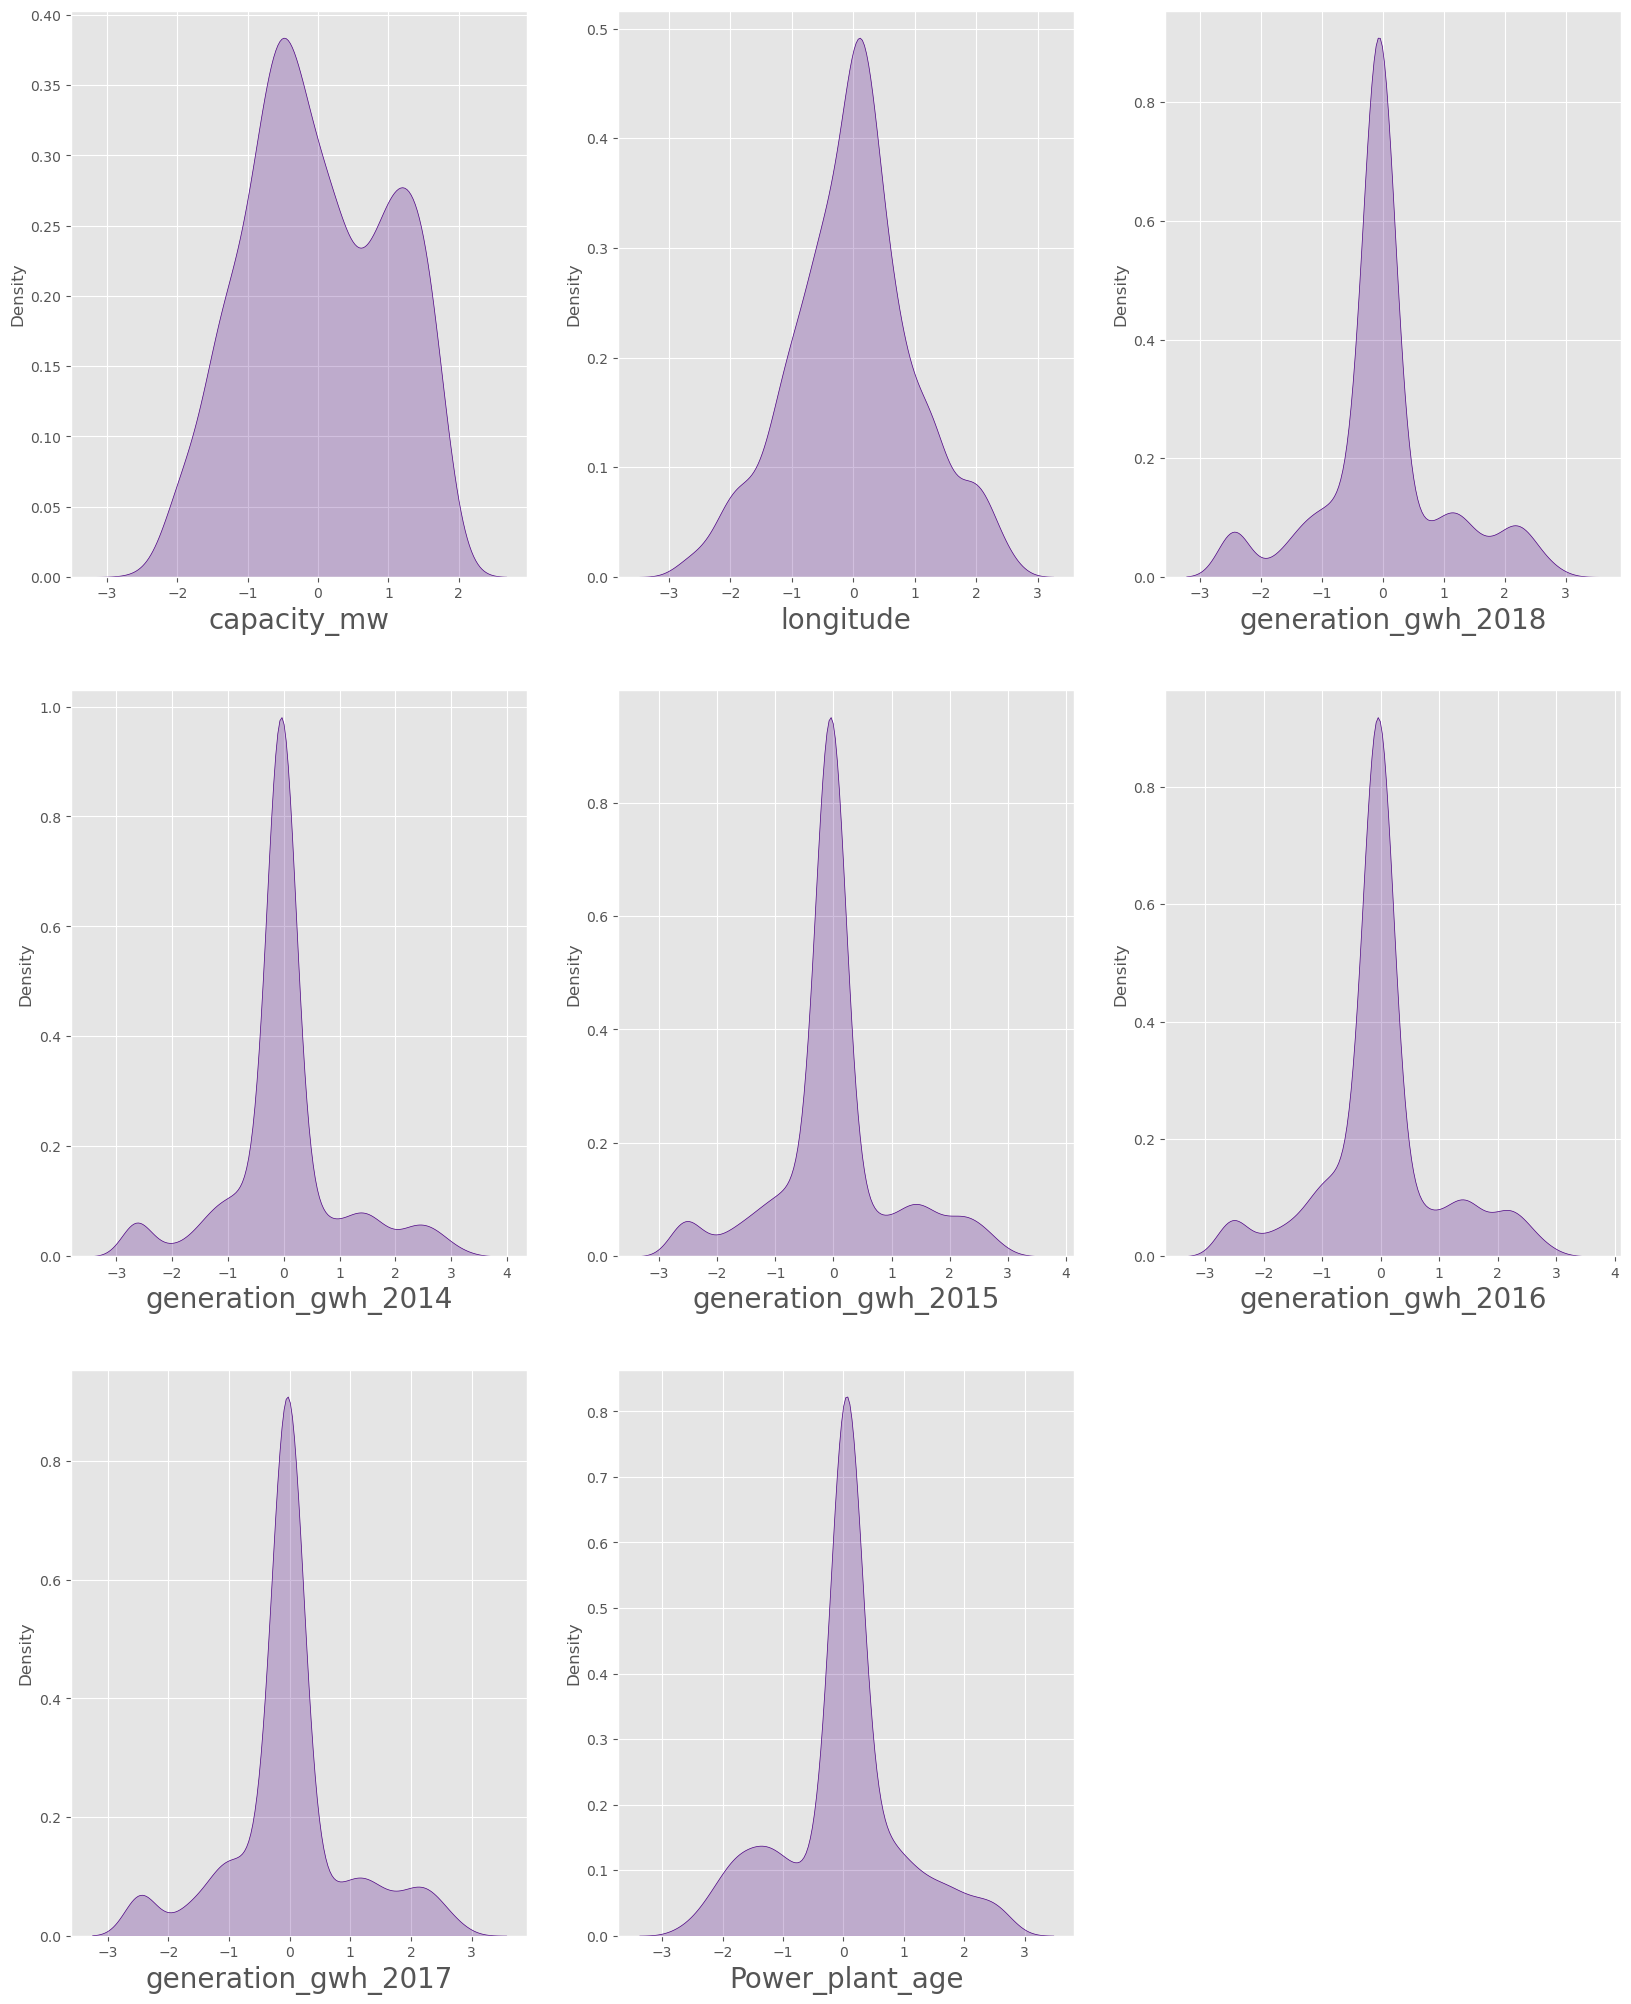

In [116]:
# let's check how the data has been distributed in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is not normal but we can notice the skewness has been removed.


In [117]:
# from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df), columns=x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


So here we have scaled the dat using Standard Scalarization method to overcome with the issue of data biasness.

As we have observed in the heat map there is multicolinearity issue exists in the data, so let's check the VIF value and if the columns have VIF > 10 then we can drop those columns.

# Checking VIF values


In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns
vif

,VIF values,Features
0,1.811775,capacity_mw
1,1.193670,longitude
2,1.413037,source
3,1.590869,geolocation_source
4,3.621608,generation_gwh_2014
5,6.190754,generation_gwh_2015
6,9.961303,generation_gwh_2016
7,9.767170,generation_gwh_2017
8,8.961146,generation_gwh_2018
9,1.153813,Power_plant_age


The VIF value is less than 10 in all the columns which means we are free from multicolinearity problem.


In [119]:
y_df.value_counts()


1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: Fuel_Type, dtype: int64

Here we can observe that the target variable Fuel_Type has multi classes means it is a multiclassification problem .
Also the data is not balanced so we will use oversampling method to balance the data.

# Oversampling

In [120]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_df, y_df = SM.fit_resample(x_df,y_df)

In [121]:
y_df.value_counts()


6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: Fuel_Type, dtype: int64

Since the highest count of the target is 240 so the data is balanced by oversampling all the classes to the count 240

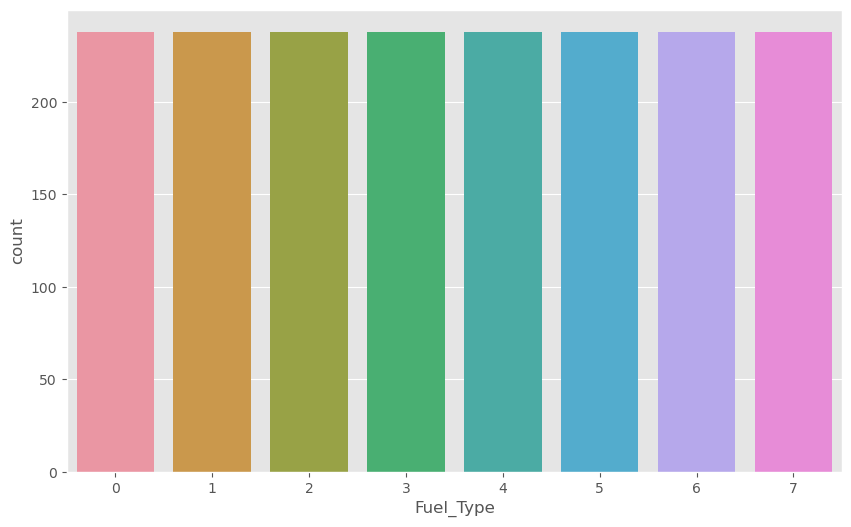

In [122]:
# visualize the data after balancing
plt.figure(figsize=(10,6))
sns.countplot(y_df)
plt.show()

Here we can clearly visualize the dat in all the types are equal.


In [123]:
x_df.head()


,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


This is the dataframe after preprocessing and cleaning the data


# Modeling

# Finding the best random state


In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
macRS=0
for i in range(1,200):
    x_df_train,x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size=.30,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_df_train,y_df_train)
    pred = DTC.predict(x_df_test)
    acc=accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9090909090909091  on Random_state  115


# Creating train_test_split


In [125]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,test_size=.30,random_state=maxRS)


We have created a new train test split using Random State


In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier


In [127]:
# checking accuracy for decision tree classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_df_train,y_df_train)

# prediction
predDTC = DTC.predict(x_df_test)

print(accuracy_score(y_df_test, predDTC))
print(confusion_matrix(y_df_test, predDTC))
print(classification_report(y_df_test, predDTC))

0.9090909090909091
[[76  1  0  0  0  1  0  0]
 [ 4 44  4  7  4  3  0  0]
 [ 0  5 58  2  4  4  0  0]
 [ 0  3  1 63  3  1  0  0]
 [ 0  1  1  0 66  0  0  0]
 [ 0  1  2  0  0 55  0  0]
 [ 0  0  0  0  0  0 82  0]
 [ 0  0  0  0  0  0  0 76]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        78
           1       0.80      0.67      0.73        66
           2       0.88      0.79      0.83        73
           3       0.88      0.89      0.88        71
           4       0.86      0.97      0.91        68
           5       0.86      0.95      0.90        58
           6       1.00      1.00      1.00        82
           7       1.00      1.00      1.00        76

    accuracy                           0.91       572
   macro avg       0.90      0.91      0.90       572
weighted avg       0.91      0.91      0.91       572



So here we are getting 88% accuracy using DTC
We can also observe th confusion matrx which contains True-Positive, False-Positive rate and False-Negative, True-Negative rate.

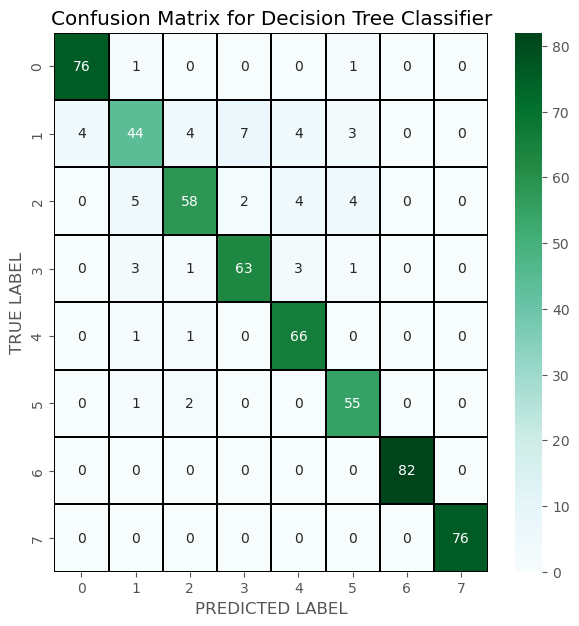

In [128]:
# let's plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,predDTC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

# Random Forest Classifier


In [129]:
RFC = RandomForestClassifier()
RFC.fit(x_df_train,y_df_train)

# prediction
predRFC = RFC.predict(x_df_test)

print(accuracy_score(y_df_test, predRFC))
print(confusion_matrix(y_df_test, predRFC))
print(classification_report(y_df_test, predRFC))


0.9108391608391608
[[74  2  0  0  0  2  0  0]
 [ 4 44  6  6  3  3  0  0]
 [ 1  3 55  3  2  9  0  0]
 [ 0  2  4 64  1  0  0  0]
 [ 0  0  0  0 68  0  0  0]
 [ 0  0  0  0  0 58  0  0]
 [ 0  0  0  0  0  0 82  0]
 [ 0  0  0  0  0  0  0 76]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        78
           1       0.86      0.67      0.75        66
           2       0.85      0.75      0.80        73
           3       0.88      0.90      0.89        71
           4       0.92      1.00      0.96        68
           5       0.81      1.00      0.89        58
           6       1.00      1.00      1.00        82
           7       1.00      1.00      1.00        76

    accuracy                           0.91       572
   macro avg       0.91      0.91      0.90       572
weighted avg       0.91      0.91      0.91       572



The Random Forest Classifier has accuracy 91%


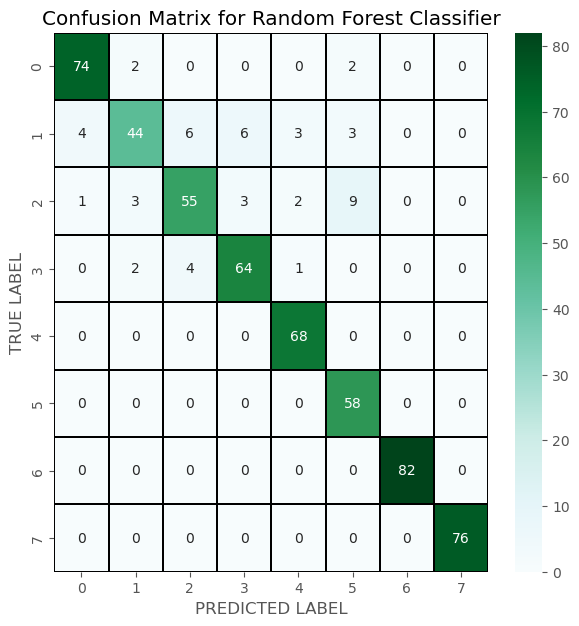

In [130]:
# let's plot confusion matrix for RFC
cm = confusion_matrix(y_df_test,predRFC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

# Support Vector Classifier


In [131]:
svc = SVC()
svc.fit(x_df_train,y_df_train)

# prediction
predsvc = svc.predict(x_df_test)

print(accuracy_score(y_df_test, predsvc))
print(confusion_matrix(y_df_test, predsvc))
print(classification_report(y_df_test, predsvc))

0.8094405594405595
[[69  0  0  0  0  1  0  8]
 [ 9 34  4  6  9  2  0  2]
 [ 1  9 31 10  2 17  0  3]
 [ 0  2  5 53  3  0  0  8]
 [ 0  0  0  0 68  0  0  0]
 [ 0  2  0  0  0 51  0  5]
 [ 0  0  0  0  0  0 82  0]
 [ 0  0  1  0  0  0  0 75]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        78
           1       0.72      0.52      0.60        66
           2       0.76      0.42      0.54        73
           3       0.77      0.75      0.76        71
           4       0.83      1.00      0.91        68
           5       0.72      0.88      0.79        58
           6       1.00      1.00      1.00        82
           7       0.74      0.99      0.85        76

    accuracy                           0.81       572
   macro avg       0.80      0.80      0.79       572
weighted avg       0.81      0.81      0.80       572



The accuracy usin SVC is 77%


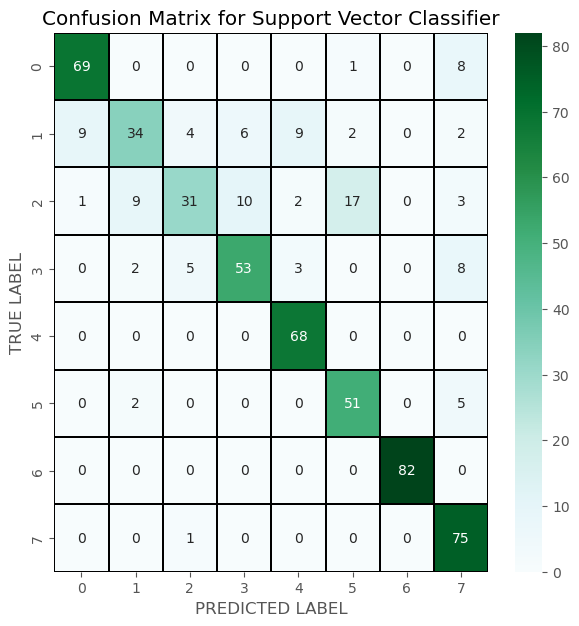

In [132]:
# let's plot confusion matrix for SVC
cm = confusion_matrix(y_df_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Support Vector Classifier")
plt.show()

# KNeighbors Classifier


In [133]:
knn = KNN()
knn.fit(x_df_train,y_df_train)

# prediction
predknn = knn.predict(x_df_test)

print(accuracy_score(y_df_test, predknn))
print(confusion_matrix(y_df_test, predknn))
print(classification_report(y_df_test, predknn))

0.8601398601398601
[[74  1  0  0  0  2  0  1]
 [ 9 33  6  4  9  4  0  1]
 [ 1  1 57  3  3  5  0  3]
 [ 0  2 11 49  1  1  0  7]
 [ 0  1  0  0 67  0  0  0]
 [ 0  0  4  0  0 54  0  0]
 [ 0  0  0  0  0  0 82  0]
 [ 0  0  0  0  0  0  0 76]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        78
           1       0.87      0.50      0.63        66
           2       0.73      0.78      0.75        73
           3       0.88      0.69      0.77        71
           4       0.84      0.99      0.91        68
           5       0.82      0.93      0.87        58
           6       1.00      1.00      1.00        82
           7       0.86      1.00      0.93        76

    accuracy                           0.86       572
   macro avg       0.86      0.85      0.85       572
weighted avg       0.86      0.86      0.85       572



The accuracy using KNN is 84%


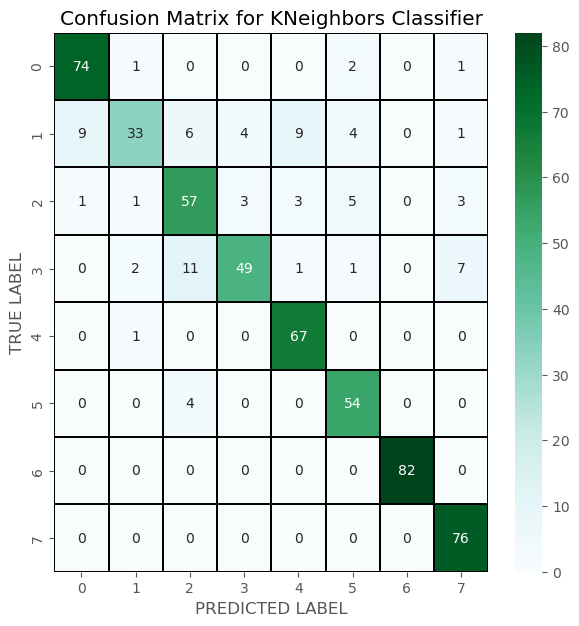

In [134]:
# let's plot confusion matrix for KNN
cm = confusion_matrix(y_df_test,predknn)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for KNeighbors Classifier")
plt.show()

# Gradient Boosting Classifier


In [135]:
GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)

# prediction
predGB = GB.predict(x_df_test)

print(accuracy_score(y_df_test, predGB))
print(confusion_matrix(y_df_test, predGB))
print(classification_report(y_df_test, predGB))

0.916083916083916
[[75  2  0  0  0  1  0  0]
 [ 5 46  4  5  3  3  0  0]
 [ 1  3 57  1  1 10  0  0]
 [ 0  1  4 66  0  0  0  0]
 [ 0  0  0  1 67  0  0  0]
 [ 0  2  1  0  0 55  0  0]
 [ 0  0  0  0  0  0 82  0]
 [ 0  0  0  0  0  0  0 76]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        78
           1       0.85      0.70      0.77        66
           2       0.86      0.78      0.82        73
           3       0.90      0.93      0.92        71
           4       0.94      0.99      0.96        68
           5       0.80      0.95      0.87        58
           6       1.00      1.00      1.00        82
           7       1.00      1.00      1.00        76

    accuracy                           0.92       572
   macro avg       0.91      0.91      0.91       572
weighted avg       0.92      0.92      0.91       572



So the accuracy using Gb is 89%


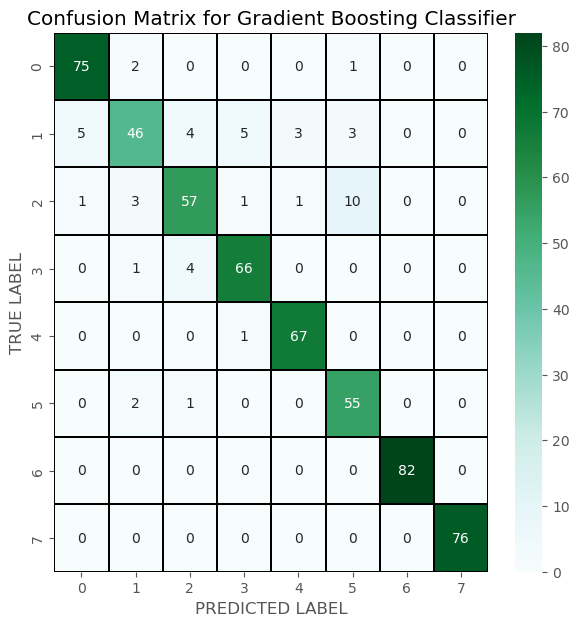

In [136]:
# let's plot confusion matrix for GB
cm = confusion_matrix(y_df_test,predGB)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()

# Bagging Classifier


In [137]:
BC = BaggingClassifier()
BC.fit(x_df_train,y_df_train)

# prediction
predBC = BC.predict(x_df_test)

print(accuracy_score(y_df_test, predBC))
print(confusion_matrix(y_df_test, predBC))
print(classification_report(y_df_test, predBC))

0.9020979020979021
[[73  4  0  0  0  1  0  0]
 [ 4 41  7  7  3  4  0  0]
 [ 0  5 54  1  2 11  0  0]
 [ 0  1  1 66  3  0  0  0]
 [ 0  0  1  0 67  0  0  0]
 [ 0  0  1  0  0 57  0  0]
 [ 0  0  0  0  0  0 82  0]
 [ 0  0  0  0  0  0  0 76]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        78
           1       0.80      0.62      0.70        66
           2       0.84      0.74      0.79        73
           3       0.89      0.93      0.91        71
           4       0.89      0.99      0.94        68
           5       0.78      0.98      0.87        58
           6       1.00      1.00      1.00        82
           7       1.00      1.00      1.00        76

    accuracy                           0.90       572
   macro avg       0.90      0.90      0.89       572
weighted avg       0.90      0.90      0.90       572



So the accuracy using BC is 90%


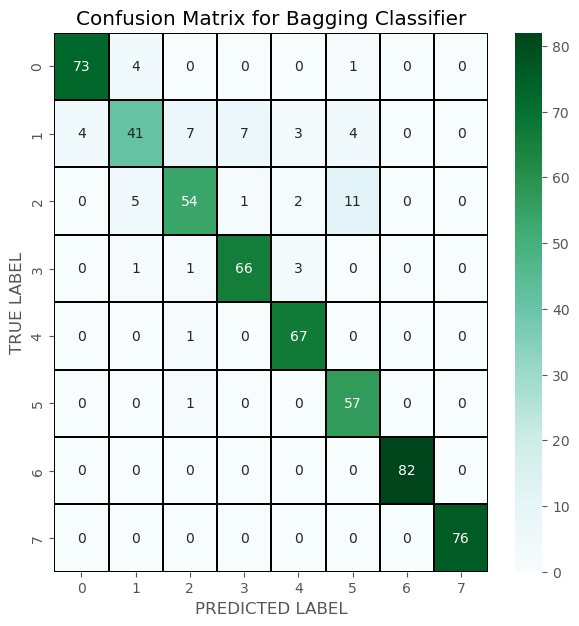

In [138]:
cm = confusion_matrix(y_df_test,predBC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Bagging Classifier")
plt.show()

# Checking the Cross Validation Score


In [139]:
from sklearn.model_selection import cross_val_score


In [140]:
print(cross_val_score(DTC ,x_df,y_df,cv=5).mean())


0.8681945020030393


In [141]:
print(cross_val_score(RFC ,x_df,y_df,cv=5).mean())


0.9149178063268406


In [142]:
print(cross_val_score(svc,x_df,y_df,cv=5).mean())


0.792536261914629


In [143]:
print(cross_val_score(knn ,x_df,y_df,cv=5).mean())


0.8529437767647465


In [144]:
print(cross_val_score(GB ,x_df,y_df,cv=5).mean())


0.8991573421743334


In [145]:
print(cross_val_score(BC ,x_df,y_df,cv=5).mean())


0.899168393424506


Above are the cross validation score for all the models used.
The difference between accuracy score and cross validation score of Gradient Boosting Classifier is very less compared to other models .

So we can conclude that Gradient Boosting Classifier as our best fitting model.

# Hyper Parameter Tuning


In [146]:
from sklearn.model_selection import GridSearchCV


In [147]:
# Gradient Boosting Classifier
parameters ={'criterion':['friedman_mse','mse','mae'],
            'max_features':['auto','sqrt','log2'],
            'n_estimators':[0,200],
            'max_depth':[2,3,4,5,6,8]}

In [148]:
GCV = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)


In [ ]:
GCV.fit(x_df_train,y_df_train)


In [ ]:
GCV.best_params_


These are the best parameter values


In [ ]:
fuel_type =GradientBoostingClassifier (criterion='friedman_mse', max_depth=8, max_features='log2', n_estimators=200)
fuel_type.fit(x_df_train,y_df_train)
pred = fuel_type.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

In [ ]:
So here we can see the accuracy of the best model is increased after tuning which is good.


# Saving the Model


In [ ]:
import joblib
joblib.dump(fuel_type,"Global_Power_Plant_Fuel_Type.pkl")

We have saved the final model using joblib.



# Conclusion :-



- The final R2 score for the prediction of capacity_mw of the power plant using Regression algorithm is = 85%
- The final Accuracy  for the prediction of Fuel_Type of the power plant using Classification algorithm is = 91%